In [1]:
#churn_df_filter# Find the character encoding for the file telecom_churn_data.csv file
# Use this encoding to read the file

#import chardet
#from pathlib import Path
#folder = Path('.')
#rawdata = open(folder/'telecom_churn_data.csv', 'rb').read()
#result = chardet.detect(rawdata)
#charenc = result['encoding']
#print(charenc)

#The detected encoding was found to be ascii.
#Above code has been commented since it has been detected once and we can ignore to run it repeatedly 

In [2]:
# Let's import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We have to use latest version as, seabrone: 0.9.0, for Catplot to work
from pathlib import Path

In [3]:
# Load the input file
#folder = Path('.')

#folder = Path('.')
folder = Path('.')
churn_df_orig = pd.read_csv(folder/'telecom_churn_data.csv', encoding = "ascii")

#We may need to relook at the original data, so churn_df_orig dataframe shall be used for this purpose
#churn_df will be the dataframe which will undergo all the manipulations

# Data Preparation (includes cleaning, missing value treatment and feature engineering)

In [4]:
#Make a copy

churn_df = churn_df_orig

In [5]:
# since we can't see many columns, let's widen the column display limit
pd.set_option('display.max_columns', 226)
pd.set_option('display.max_rows', 200)

In [6]:
churn_df_orig.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [7]:
churn_df_orig.loc[churn_df_orig['total_rech_amt_6']<(churn_df_orig['total_rech_data_6']*churn_df_orig['av_rech_amt_data_6'])].head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
32     7000382876        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
56     7002180748        109             0.0             0.0             0.0   
57     7001682585        109             0.0             0.0             0.0   
84     7001576437        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
32            6/30/2014            7/31/2014            8/31/2014   
33            6/30/2014            7/31/2014            8/31/2014   
56            6/30/2014            7/31/2014            8/31/2014   
57            6/30/2014            7/31/2014            8/31/2014   
84            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7   arpu_8    arpu_9  onnet_mou_6  \
32            9/30/2014    60.651    22.064   52.380     0.000         0.00   
33            9/30/2014   977.020  2362.833  409.230   799.356         0.00   
56            9/30/2014   452.624   320.548  368.807   281.710        34.46   
57            9/30/2014  1201.298   687.704  602.052  1529.608        61.23   
84            9/30/2014    87.296    60.208   33.621   272.831        11.28   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
32         0.00        39.29          NaN         10.90          0.00   
33         0.00         0.00         0.00          0.00          0.00   
56        43.11        50.61        27.49        131.59         90.61   
57         7.39        62.89       119.44        165.41        211.31   
84         8.43         6.46         0.99         26.83          8.98   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
32          0.20           NaN            0.0            0.0            0.0   
33          0.00          0.00            0.0            0.0            0.0   
56         84.31         97.03            0.0            0.0            0.0   
57        168.01        205.89            0.0            0.0            0.0   
84          9.64         10.68            0.0            0.0            0.0   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
32            NaN            0.0            0.0            0.0            NaN   
33            0.0            0.0            0.0            0.0            0.0   
56            0.0            0.0            0.0            0.0            0.0   
57            0.0            0.0            0.0            0.0            0.0   
84            0.0            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
32              0.00              0.00             39.29               NaN   
33              0.00              0.00              0.00              0.00   
56             34.46             43.11             50.61             27.49   
57             28.54              4.36              5.01             74.54   
84             11.28              8.43              6.46              0.99   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
32             10.90              0.00              0.20               NaN   
33              0.00              0.00              0.00              0.00   
56            128.41             85.58             73.61             92.96   
57            151.66            123.19            135.11            152.81   
84             26.83              8.73              8.99             10.18   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
32              0.00              0.00              0.00               NaN   
33              0.00              0.00              0.00              0.00   
56              3.18              1.76              4.28    

In [8]:
churn_df_orig[churn_df_orig['mobile_number']==7000382876]

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
32     7000382876        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
32            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
32            9/30/2014  60.651  22.064   52.38     0.0          0.0   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
32          0.0        39.29          NaN          10.9           0.0   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
32           0.2           NaN            0.0            0.0            0.0   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
32            NaN            0.0            0.0            0.0            NaN   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
32               0.0               0.0             39.29               NaN   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
32              10.9               0.0               0.2               NaN   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
32               0.0               0.0               0.0               NaN   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
32               0.0               0.0               0.0               NaN   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
32          10.9           0.0         39.49           NaN               0.0   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
32               0.0               0.0               NaN               0.0   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
32               0.0               0.0               NaN               0.0   

    std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
32               0.0               0.0               NaN               0.0   

    std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  \
32               0.0               0.0               NaN           0.0   

    std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
32           0.0           0.0           NaN           0.0           0.0   

    isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
32           0.0           NaN          0.21           0.7         18.14   

    spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
32           NaN          0.0          0.0          0.0          NaN   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
32           11.11             0.7           57.64             0.0   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  \
32              7.98              8.59              6.41               NaN   

    loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  \
32              6.46             23.51              0.54               NaN   

    loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  \
32               0.0               0.0               0.0               NaN   

    loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  \
32         14.44         32.11          6.96           NaN               0.0   

    std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  \
32               0.0               0.0               NaN               0.0   

    std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  \
32               0.0               0.0               NaN               0.0   

    std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  \
32               0.0               0.0               NaN         

In [9]:
# Load the data dictionary
#dict_df = pd.read_excel(folder/'DataDictionaryTelecomChurnCaseStudy.xlsx')

In [10]:
#ict_df.head(50)

In [11]:
# save initial column list
init_col_list = list(churn_df.columns)

In [12]:
# Columns could have some whitespace, let's get rid of those
churn_df.columns = churn_df.columns.map(lambda x: x.strip())

In [13]:
churn_df.shape

(99999, 226)

In [14]:
# Find columns that are totally empty or have 100% NaN values
emptycol_list = []
for i in churn_df.columns:
    if churn_df[i].isnull().all() == True:
        emptycol_list.append(i)
print("Empty columns are: ", emptycol_list)
print("Total empty columns are:", len(emptycol_list))

Empty columns are:  []
Total empty columns are: 0


In [15]:
# Let's drop all columns having all NaNs
#there are no columns having all NaNs
churn_df.shape
churn_df = churn_df.dropna(axis=1,how='all')

In [16]:
churn_df.shape

(99999, 226)

In [17]:
churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [18]:
# Let's see which of the columns have only one unique value in entire series.
# And let's drop those
#circle_id and last_date_of_month_6 is dropped
for i in churn_df.columns:
    if len(churn_df[i].unique()) == 1:
        print(i , churn_df[i].value_counts())
        churn_df.drop(i, axis = 1, inplace=True)

circle_id 109    99999
Name: circle_id, dtype: int64
last_date_of_month_6 6/30/2014    99999
Name: last_date_of_month_6, dtype: int64


In [19]:
churn_df.shape

(99999, 224)

In [20]:
#Let us check the unique values in all fields
for i in churn_df.columns:
    print(i , len(churn_df[i].unique()))


mobile_number 99999
loc_og_t2o_mou 2
std_og_t2o_mou 2
loc_ic_t2o_mou 2
last_date_of_month_7 2
last_date_of_month_8 2
last_date_of_month_9 2
arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24314
onnet_mou_7 24337
onnet_mou_8 24090
onnet_mou_9 23566
offnet_mou_6 31141
offnet_mou_7 31024
offnet_mou_8 30909
offnet_mou_9 30078
roam_ic_mou_6 6513
roam_ic_mou_7 5231
roam_ic_mou_8 5316
roam_ic_mou_9 4828
roam_og_mou_6 8039
roam_og_mou_7 6640
roam_og_mou_8 6505
roam_og_mou_9 5883
loc_og_t2t_mou_6 13540
loc_og_t2t_mou_7 13412
loc_og_t2t_mou_8 13337
loc_og_t2t_mou_9 12950
loc_og_t2m_mou_6 20906
loc_og_t2m_mou_7 20638
loc_og_t2m_mou_8 20545
loc_og_t2m_mou_9 20142
loc_og_t2f_mou_6 3861
loc_og_t2f_mou_7 3864
loc_og_t2f_mou_8 3808
loc_og_t2f_mou_9 3759
loc_og_t2c_mou_6 2236
loc_og_t2c_mou_7 2427
loc_og_t2c_mou_8 2517
loc_og_t2c_mou_9 2333
loc_og_mou_6 26373
loc_og_mou_7 26092
loc_og_mou_8 25991
loc_og_mou_9 25377
std_og_t2t_mou_6 18245
std_og_t2t_mou_7 18568
std_og_t2t_mou_8 18292
std

In [21]:
# Let us check the columns having only 2 unique values
# Among these, we aim to drop the columns that have Null as one of the values
#-Pankaj
null_val_col_list = []
for i in churn_df.columns:
    if len(churn_df[i].unique()) == 2:
        print("For column: {}, the unique values are: {}".format(i, churn_df[i].unique()))
        null_val_col_list.append(i)

For column: loc_og_t2o_mou, the unique values are: [ 0. nan]
For column: std_og_t2o_mou, the unique values are: [ 0. nan]
For column: loc_ic_t2o_mou, the unique values are: [ 0. nan]
For column: last_date_of_month_7, the unique values are: ['7/31/2014' nan]
For column: last_date_of_month_8, the unique values are: ['8/31/2014' nan]
For column: last_date_of_month_9, the unique values are: ['9/30/2014' nan]
For column: std_og_t2c_mou_6, the unique values are: [nan  0.]
For column: std_og_t2c_mou_7, the unique values are: [nan  0.]
For column: std_og_t2c_mou_8, the unique values are: [ 0. nan]
For column: std_og_t2c_mou_9, the unique values are: [nan  0.]
For column: std_ic_t2o_mou_6, the unique values are: [nan  0.]
For column: std_ic_t2o_mou_7, the unique values are: [nan  0.]
For column: std_ic_t2o_mou_8, the unique values are: [ 0. nan]
For column: std_ic_t2o_mou_9, the unique values are: [nan  0.]


In [22]:
null_val_col_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [23]:
len(null_val_col_list)

14

In [24]:
# We can remove all columns in null_val_col_list
churn_df.drop(columns = null_val_col_list, axis=1, inplace=True)

In [25]:
churn_df.shape

(99999, 210)

In [26]:
# We will calculate percentage of null values in the entire dataset for each of the attributes

percentage_null_df=pd.DataFrame(round(100*(churn_df.isnull().sum()/len(churn_df.index)),2))
percentage_null_df.head()

0
mobile_number  0.0
arpu_6         0.0
arpu_7         0.0
arpu_8         0.0
arpu_9         0.0

In [27]:
# renaming column to Percentage
percentage_null_df.columns=["Percentage"]

In [28]:
# To get percentage of Null values in the data set in descending order
percentage_null_df=percentage_null_df.sort_values('Percentage',ascending=False)
percentage_null_df.head(50)

Percentage
max_rech_data_6                74.85
fb_user_6                      74.85
count_rech_3g_6                74.85
count_rech_2g_6                74.85
night_pck_user_6               74.85
arpu_3g_6                      74.85
total_rech_data_6              74.85
av_rech_amt_data_6             74.85
arpu_2g_6                      74.85
date_of_last_rech_data_6       74.85
arpu_3g_7                      74.43
night_pck_user_7               74.43
total_rech_data_7              74.43
date_of_last_rech_data_7       74.43
av_rech_amt_data_7             74.43
max_rech_data_7                74.43
fb_user_7                      74.43
count_rech_3g_7                74.43
arpu_2g_7                      74.43
count_rech_2g_7                74.43
count_rech_3g_9                74.08
date_of_last_rech_data_9       74.08
count_rech_2g_9                74.08
fb_user_9                      74.08
total_rech_data_9              74.08
max_rech_data_9                74.08
night_pck_user_9               74.08
arpu_2g_9                      74.08
av_rech_amt_data_9             74.08
arpu_3g_9                      74.08
arpu_3g_8                      73.66
fb_user_8                      73.66
total_rech_data_8              73.66
count_rech_2g_8                73.66
arpu_2g_8                      73.66
date_of_last_rech_data_8       73.66
count_rech_3g_8                73.66
max_rech_data_8                73.66
av_rech_amt_data_8             73.66
night_pck_user_8               73.66
loc_og_t2t_mou_9                7.75
std_ic_t2m_mou_9                7.75
isd_og_mou_9                    7.75
roam_og_mou_9                   7.75
std_ic_t2t_mou_9                7.75
spl_og_mou_9                    7.75
loc_ic_mou_9                    7.75
og_others_9                     7.75
roam_ic_mou_9                   7.75
ic_others_9                     7.75

In [29]:
churn_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [30]:
# we see that 'count' column doesnt offer much in terms of data explanation and since it has close to 75% of Null Values we can comfortably remove them
churn_df.drop(['count_rech_2g_6'], axis = 1, inplace = True)
churn_df.drop(['count_rech_2g_7'], axis = 1, inplace = True)
churn_df.drop(['count_rech_2g_8'], axis = 1, inplace = True)
churn_df.drop(['count_rech_2g_9'], axis = 1, inplace = True)
churn_df.drop(['count_rech_3g_6'], axis = 1, inplace = True)
churn_df.drop(['count_rech_3g_7'], axis = 1, inplace = True)
churn_df.drop(['count_rech_3g_8'], axis = 1, inplace = True)
churn_df.drop(['count_rech_3g_9'], axis = 1, inplace = True)

In [31]:
# Again we see that max_rech_ data attribute would be redundant for us, since we are making use of total revenue and recharge usage / month / user 
churn_df.drop(['max_rech_data_6'], axis = 1, inplace = True)
churn_df.drop(['max_rech_data_7'], axis = 1, inplace = True)
churn_df.drop(['max_rech_data_8'], axis = 1, inplace = True)
churn_df.drop(['max_rech_data_9'], axis = 1, inplace = True)

In [32]:
# We will drop insiginificant columns where in even if we fill Null values it doesnt add anything to data

churn_df.drop(['date_of_last_rech_data_6'], axis = 1, inplace = True)
churn_df.drop(['date_of_last_rech_data_7'], axis = 1, inplace = True)
churn_df.drop(['date_of_last_rech_data_8'], axis = 1, inplace = True)
churn_df.drop(['date_of_last_rech_data_9'], axis = 1, inplace = True)

In [33]:
churn_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [34]:
# make a copy 
churn_df_filter=churn_df

In [35]:
churn_df_filter.shape

(99999, 194)

In [36]:
# To check how many unique values are there for the months June, July, August. 
churn_df_filter['night_pck_user_6'].unique()
churn_df_filter['night_pck_user_7'].unique()
churn_df_filter['night_pck_user_8'].unique()

array([ 0., nan,  1.])

In [37]:
churn_df_filter.isnull().sum()

mobile_number              0
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6             3937
onnet_mou_7             3859
onnet_mou_8             5378
onnet_mou_9             7745
offnet_mou_6            3937
offnet_mou_7            3859
offnet_mou_8            5378
offnet_mou_9            7745
roam_ic_mou_6           3937
roam_ic_mou_7           3859
roam_ic_mou_8           5378
roam_ic_mou_9           7745
roam_og_mou_6           3937
roam_og_mou_7           3859
roam_og_mou_8           5378
roam_og_mou_9           7745
loc_og_t2t_mou_6        3937
loc_og_t2t_mou_7        3859
loc_og_t2t_mou_8        5378
loc_og_t2t_mou_9        7745
loc_og_t2m_mou_6        3937
loc_og_t2m_mou_7        3859
loc_og_t2m_mou_8        5378
loc_og_t2m_mou_9        7745
loc_og_t2f_mou_6        3937
loc_og_t2f_mou_7        3859
loc_og_t2f_mou_8        5378
loc_og_t2f_mou_9        7745
loc_og_t2c_mou_6        3937
loc_og_t2c_mou

In [38]:
#Let us fill all nan to 0 indicating that services are not availed wherever it is null
# We will add 0's only to those columns which are important to us. others we will drop in future
churn_df_filter.fillna(0,axis=1,inplace=True)

In [39]:
churn_df_filter.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100         0.00   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00              0.00   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00          0.00              0.00   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [40]:
# now lets check if there are any more null values
# seems like there are no null values
churn_df_filter.isnull().sum()

mobile_number          0
arpu_6                 0
arpu_7                 0
arpu_8                 0
arpu_9                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_t2c_mou_9       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0


In [41]:
#Let us check the unique values again in all fields
for i in churn_df.columns:
     print(i , len(churn_df_filter[i].unique()))

mobile_number 99999
arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24313
onnet_mou_7 24336
onnet_mou_8 24089
onnet_mou_9 23565
offnet_mou_6 31140
offnet_mou_7 31023
offnet_mou_8 30908
offnet_mou_9 30077
roam_ic_mou_6 6512
roam_ic_mou_7 5230
roam_ic_mou_8 5315
roam_ic_mou_9 4827
roam_og_mou_6 8038
roam_og_mou_7 6639
roam_og_mou_8 6504
roam_og_mou_9 5882
loc_og_t2t_mou_6 13539
loc_og_t2t_mou_7 13411
loc_og_t2t_mou_8 13336
loc_og_t2t_mou_9 12949
loc_og_t2m_mou_6 20905
loc_og_t2m_mou_7 20637
loc_og_t2m_mou_8 20544
loc_og_t2m_mou_9 20141
loc_og_t2f_mou_6 3860
loc_og_t2f_mou_7 3863
loc_og_t2f_mou_8 3807
loc_og_t2f_mou_9 3758
loc_og_t2c_mou_6 2235
loc_og_t2c_mou_7 2426
loc_og_t2c_mou_8 2516
loc_og_t2c_mou_9 2332
loc_og_mou_6 26372
loc_og_mou_7 26091
loc_og_mou_8 25990
loc_og_mou_9 25376
std_og_t2t_mou_6 18244
std_og_t2t_mou_7 18567
std_og_t2t_mou_8 18291
std_og_t2t_mou_9 17934
std_og_t2m_mou_6 19734
std_og_t2m_mou_7 20018
std_og_t2m_mou_8 19786
std_og_t2m_mou_9 19052
std_og_t

In [42]:
churn_df_filter[['total_rech_data_6']].head()

total_rech_data_6
0                1.0
1                0.0
2                0.0
3                0.0
4                1.0

In [43]:
churn_df_filter['total_data_rech_6'] = churn_df_filter['total_rech_data_6'] * churn_df_filter['av_rech_amt_data_6']


In [44]:
churn_df_filter['total_data_rech_7'] = churn_df_filter['total_rech_data_7'] * churn_df_filter['av_rech_amt_data_7']

churn_df_filter['amt_data_6'] = churn_df_filter['total_rech_amt_6'] + churn_df_filter['total_data_rech_6']
churn_df_filter['amt_data_7'] = churn_df_filter['total_rech_amt_7'] + churn_df_filter['total_data_rech_7']

#churn_df_filter['av_amt_data_good'] = churn_df_filter[['amt_data_6', 'amt_data_7']].mean(axis=1)

In [45]:
churn_df_filter.shape

(99999, 198)

In [46]:
churn_df_filter['total_data_rech_8'] = churn_df_filter['total_rech_data_8'] * churn_df_filter['av_rech_amt_data_8']
churn_df_filter['total_data_rech_9'] = churn_df_filter['total_rech_data_9'] * churn_df_filter['av_rech_amt_data_9']
churn_df_filter['amt_data_8'] = churn_df_filter['total_rech_amt_8'] + churn_df_filter['total_data_rech_8']
churn_df_filter['amt_data_9'] = churn_df_filter['total_rech_amt_9'] + churn_df_filter['total_data_rech_9']

In [47]:
# Some columns do not conform to the nomenclature standards of the dataset, let's fix those
# Pankaj - moved this code up
churn_df_filter.rename(columns = {'aug_vbc_3g':'vbc_3g_8'}, inplace = True)
churn_df_filter.rename(columns = {'jun_vbc_3g':'vbc_3g_6'}, inplace = True)
churn_df_filter.rename(columns = {'jul_vbc_3g':'vbc_3g_7'}, inplace = True)
churn_df_filter.rename(columns = {'sep_vbc_3g':'vbc_3g_9'}, inplace = True)

In [48]:
# Create column list that can be modified for transformation to _good, _action, _churn types
# Pankaj
xform_cols_list = []
for i in churn_df_filter.columns:
    if (i[-2:] == '_6') & (len(churn_df_filter[i].unique()) >= 20) :
        xform_cols_list.append(i[0:len(i)-2])
print(xform_cols_list)

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'date_of_last_rech', 'last_day_rch_amt', 'total_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'sachet_2g', 'sachet_3g', 'vbc_3g', 'total_data_rech', 'amt_data']


In [49]:
# sachet_2g and sachet_3g are different types since they represent no. of sachet schemes availed by the customer
# so we can remove those
xform_cols_list.remove('sachet_2g')
xform_cols_list.remove('sachet_3g')
xform_cols_list.remove('date_of_last_rech')
xform_cols_list

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'vbc_3g',
 'total_data_rech',
 'amt_data']

In [50]:
# Now let's transform these columns
for i in xform_cols_list:
    churn_df_filter[i+'_6'] = round((churn_df_filter[i+'_6'] + churn_df_filter[i+'_7'])/2, 2)
    churn_df_filter.rename(columns={i+'_6': i+'_good'}, inplace=True)
    churn_df_filter.rename(columns={i+'_8': i+'_action'}, inplace=True)
    churn_df_filter.rename(columns={i+'_9': i+'_churn'}, inplace=True)
    churn_df_filter.drop([i+'_7'], axis=1, inplace=True)

In [51]:
# Some columns are clearly just totals of a few others, they will be highly correlated, so we can remove those
# agg_columns = ['loc_ic_mou_', 'std_ic_mou_', 'total_ic_mou_', 'spl_ic_mou_', 'loc_og_mou_', 'std_og_mou_',
#                'total_og_mou_']
# for i in agg_columns:
#     churn_df_filter.drop([i+'good', i+'action', i+'churn'], axis=1, inplace=True)

In [52]:
# We see that there are columns with date type information, let's drop those for now
churn_df_filter.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1, inplace = True)

In [53]:
churn_df_filter.head()

mobile_number  arpu_good  arpu_action  arpu_churn  onnet_mou_good  \
0     7000842753     206.10      213.803      21.100            0.00   
1     7001865778     194.56      268.321      86.285           51.40   
2     7001625959     178.37      210.226     290.714           33.39   
3     7001204172     236.22      508.054     389.500           77.15   
4     7000142493     285.76      238.174     163.426           99.88   

   onnet_mou_action  onnet_mou_churn  offnet_mou_good  offnet_mou_action  \
0              0.00             0.00             0.00               0.00   
1              7.68            18.34            57.79             304.76   
2             37.26            74.81           181.96             208.36   
3            310.98           241.71           116.16              71.68   
4             83.89            58.78            84.42             124.26   

   offnet_mou_churn  roam_ic_mou_good  roam_ic_mou_action  roam_ic_mou_churn  \
0              0.00              0.00                0.00               0.00   
1             53.76              0.00                0.00               0.00   
2            118.91              0.00                0.00              38.49   
3            113.54             27.43               44.38               0.00   
4             45.81              0.00                0.00               0.00   

   roam_og_mou_good  roam_og_mou_action  roam_og_mou_churn  \
0              0.00                0.00               0.00   
1              0.00                0.00               0.00   
2              0.00                0.00              70.94   
3             14.04               39.04               0.00   
4              0.00                0.00               0.00   

   loc_og_t2t_mou_good  loc_og_t2t_mou_action  loc_og_t2t_mou_churn  \
0                 0.00                   0.00                  0.00   
1                49.22                   7.68                 18.34   
2                17.96                  13.58                 14.39   
3                54.24                  10.61                 15.49   
4                99.88                  83.89                 58.78   

   loc_og_t2m_mou_good  loc_og_t2m_mou_action  loc_og_t2m_mou_churn  \
0                 0.00                   0.00                  0.00   
1                43.72                 291.86                 53.76   
2                23.10                  38.46                 28.16   
3                95.32                  22.46                 65.46   
4                79.76                 124.26                 37.89   

   loc_og_t2f_mou_good  loc_og_t2f_mou_action  loc_og_t2f_mou_churn  \
0                 0.00                   0.00                  0.00   
1                 0.00                   0.00                  0.00   
2                22.95                  15.61                 22.24   
3                 1.28                   4.91                  2.06   
4                 0.00                   0.00                  1.93   

   loc_og_t2c_mou_good  loc_og_t2c_mou_action  loc_og_t2c_mou_churn  \
0                 0.00                   0.00                  0.00   
1                 1.46                   0.00                  0.00   
2                67.77                  45.76                  0.48   
3                 0.00                   0.00                  0.00   
4                 0.00                   0.00                  0.00   

   loc_og_mou_good  loc_og_mou_action  loc_og_mou_churn  std_og_t2t_mou_good  \
0             0.00               0.00              0.00                 0.00   
1            92.95             299.54             72.11                 2.17   
2            64.04              67.66             64.81                15.42   
3           150.86              37.99             83.03                20.56   
4           179.64             208.16             98.61                 0.00   

   std_og_t2t_mou_action  std_og_t2t_mou_churn  std_og_t2m_mou_good  \

In [54]:
# Columns that seem to be categorical
cols_cat_list = ['night_pck_user_', 'fb_user_']
for i in cols_cat_list:
    for j in range(6,10):
        print("For column {}, unique values are: {}".format(i+str(j), churn_df_filter[i+str(j)].unique()))

For column night_pck_user_6, unique values are: [0. 1.]
For column night_pck_user_7, unique values are: [0. 1.]
For column night_pck_user_8, unique values are: [0. 1.]
For column night_pck_user_9, unique values are: [0. 1.]
For column fb_user_6, unique values are: [1. 0.]
For column fb_user_7, unique values are: [1. 0.]
For column fb_user_8, unique values are: [1. 0.]
For column fb_user_9, unique values are: [0. 1.]


In [55]:
# # Some columns are misrepresented as float, let's fix those
# churn_df_filter['night_pck_user_6'] = churn_df_filter['night_pck_user_6'].astype('int')
# churn_df_filter['night_pck_user_7'] = churn_df_filter['night_pck_user_7'].astype('int')
# churn_df_filter['night_pck_user_8'] = churn_df_filter['night_pck_user_8'].astype('int')
# churn_df_filter['night_pck_user_9'] = churn_df_filter['night_pck_user_9'].astype('int')
# churn_df_filter['fb_user_6'] = churn_df_filter['fb_user_6'].astype('int')
# churn_df_filter['fb_user_7'] = churn_df_filter['fb_user_7'].astype('int')
# churn_df_filter['fb_user_8'] = churn_df_filter['fb_user_8'].astype('int')
# churn_df_filter['fb_user_9'] = churn_df_filter['fb_user_9'].astype('int')

In [56]:
churn_df_filter['monthly_2g_6'].value_counts()

0    92674
1     6728
2      562
3       28
4        7
Name: monthly_2g_6, dtype: int64

In [57]:
# # Binning on the basis of monthly 2g packs
# # 0 - indicates low usage, 1 indicates high 
# churn_df_filter['high_usage_monthly_2g_6'] = churn_df_filter['monthly_2g_6'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_monthly_2g_7'] = churn_df_filter['monthly_2g_7'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_monthly_2g_8'] = churn_df_filter['monthly_2g_8'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_monthly_2g_9'] = churn_df_filter['monthly_2g_9'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter.drop(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9'],  axis=1, inplace=True)

In [58]:
churn_df_filter['sachet_2g_6'].value_counts()

0     87096
1      5607
2      2461
3      1333
4       950
5       584
6       464
7       343
8       291
9       230
10      194
11      119
12      111
13       53
14       44
15       28
17       18
16       16
18       13
19       13
22        7
20        6
21        5
24        3
25        3
39        1
27        1
28        1
30        1
32        1
34        1
42        1
Name: sachet_2g_6, dtype: int64

In [59]:
# # Binning on the basis of Sachet 2g packs
# # 0 - indicates low usage, 1 indicates high 
# churn_df_filter['high_usage_sachet_2g_6'] = churn_df_filter['sachet_2g_6'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_sachet_2g_7'] = churn_df_filter['sachet_2g_7'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_sachet_2g_8'] = churn_df_filter['sachet_2g_8'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_sachet_2g_9'] = churn_df_filter['sachet_2g_9'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter.drop(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9'],  axis=1, inplace=True)

In [60]:
churn_df_filter['monthly_3g_6'].value_counts()

0     94290
1      4472
2       861
3       237
4        76
5        34
6        12
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64

In [61]:
# # Binning on the basis of monthly 3g packs
# # 0 - indicates low usage, 1 indicates high 
# churn_df_filter['high_usage_monthly_3g_6'] = churn_df_filter['monthly_3g_6'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_monthly_3g_7'] = churn_df_filter['monthly_3g_7'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_monthly_3g_8'] = churn_df_filter['monthly_3g_8'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_monthly_3g_9'] = churn_df_filter['monthly_3g_9'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter.drop(['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9'],  axis=1, inplace=True)

In [62]:
churn_df_filter['sachet_3g_6'].value_counts()

0     95818
1      2990
2       607
3       216
4       108
5        65
6        45
7        45
9        24
8        20
11       12
10       12
15        5
12        4
14        4
19        4
13        3
18        3
22        3
23        3
16        2
17        2
29        2
28        1
21        1
Name: sachet_3g_6, dtype: int64

In [63]:
# # Binning on the basis of Sachet 3g packs
# # 0 - indicates low usage, 1 indicates high 
# churn_df_filter['high_usage_sachet_3g_6'] = churn_df_filter['sachet_3g_6'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_sachet_3g_7'] = churn_df_filter['sachet_3g_7'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_sachet_3g_8'] = churn_df_filter['sachet_3g_8'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter['high_usage_sachet_3g_9'] = churn_df_filter['sachet_3g_9'].map(lambda x: 1 if x>0 else 0)
# churn_df_filter.drop(['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9'],  axis=1, inplace=True)

In [64]:
churn_df_filter.head()

mobile_number  arpu_good  arpu_action  arpu_churn  onnet_mou_good  \
0     7000842753     206.10      213.803      21.100            0.00   
1     7001865778     194.56      268.321      86.285           51.40   
2     7001625959     178.37      210.226     290.714           33.39   
3     7001204172     236.22      508.054     389.500           77.15   
4     7000142493     285.76      238.174     163.426           99.88   

   onnet_mou_action  onnet_mou_churn  offnet_mou_good  offnet_mou_action  \
0              0.00             0.00             0.00               0.00   
1              7.68            18.34            57.79             304.76   
2             37.26            74.81           181.96             208.36   
3            310.98           241.71           116.16              71.68   
4             83.89            58.78            84.42             124.26   

   offnet_mou_churn  roam_ic_mou_good  roam_ic_mou_action  roam_ic_mou_churn  \
0              0.00              0.00                0.00               0.00   
1             53.76              0.00                0.00               0.00   
2            118.91              0.00                0.00              38.49   
3            113.54             27.43               44.38               0.00   
4             45.81              0.00                0.00               0.00   

   roam_og_mou_good  roam_og_mou_action  roam_og_mou_churn  \
0              0.00                0.00               0.00   
1              0.00                0.00               0.00   
2              0.00                0.00              70.94   
3             14.04               39.04               0.00   
4              0.00                0.00               0.00   

   loc_og_t2t_mou_good  loc_og_t2t_mou_action  loc_og_t2t_mou_churn  \
0                 0.00                   0.00                  0.00   
1                49.22                   7.68                 18.34   
2                17.96                  13.58                 14.39   
3                54.24                  10.61                 15.49   
4                99.88                  83.89                 58.78   

   loc_og_t2m_mou_good  loc_og_t2m_mou_action  loc_og_t2m_mou_churn  \
0                 0.00                   0.00                  0.00   
1                43.72                 291.86                 53.76   
2                23.10                  38.46                 28.16   
3                95.32                  22.46                 65.46   
4                79.76                 124.26                 37.89   

   loc_og_t2f_mou_good  loc_og_t2f_mou_action  loc_og_t2f_mou_churn  \
0                 0.00                   0.00                  0.00   
1                 0.00                   0.00                  0.00   
2                22.95                  15.61                 22.24   
3                 1.28                   4.91                  2.06   
4                 0.00                   0.00                  1.93   

   loc_og_t2c_mou_good  loc_og_t2c_mou_action  loc_og_t2c_mou_churn  \
0                 0.00                   0.00                  0.00   
1                 1.46                   0.00                  0.00   
2                67.77                  45.76                  0.48   
3                 0.00                   0.00                  0.00   
4                 0.00                   0.00                  0.00   

   loc_og_mou_good  loc_og_mou_action  loc_og_mou_churn  std_og_t2t_mou_good  \
0             0.00               0.00              0.00                 0.00   
1            92.95             299.54             72.11                 2.17   
2            64.04              67.66             64.81                15.42   
3           150.86              37.99             83.03                20.56   
4           179.64             208.16             98.61                 0.00   

   std_og_t2t_mou_action  std_og_t2t_mou_churn  std_og_t2m_mou_good  \

In [65]:
# Columns that seem to be categorical
cols_cat_list = ['night_pck_user_', 'fb_user_']
for i in cols_cat_list:
    for j in range(6,10):
        #print("For column {}, unique values are: {}".format(i+str(j), churn_df_filter[i+str(j)].unique()))
        churn_df_filter[i+str(j)] = churn_df_filter[i+str(j)].fillna(0)

     

In [66]:
churn_df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 155 entries, mobile_number to amt_data_churn
dtypes: float64(129), int64(26)
memory usage: 118.3 MB


In [67]:
# To check how many unique values are there for the months June, July, August. 
# churn_df_filter['night_pck_user_6'].unique()
# churn_df_filter['night_pck_user_7'].unique()
# churn_df_filter['night_pck_user_8'].unique()
# churn_df_filter['fb_user_6'].unique()
# churn_df_filter['fb_user_7'].unique()
# churn_df_filter['fb_user_8'].unique()

In [68]:
cols_cat_list = ['night_pck_user', 'fb_user']

In [69]:
# Some columns are misrepresented as float, let's fix those
churn_df_filter['night_pck_user_6'] = churn_df_filter['night_pck_user_6'].astype('int')
churn_df_filter['night_pck_user_7'] = churn_df_filter['night_pck_user_7'].astype('int')
churn_df_filter['night_pck_user_8'] = churn_df_filter['night_pck_user_8'].astype('int')
churn_df_filter['night_pck_user_9'] = churn_df_filter['night_pck_user_9'].astype('int')
churn_df_filter['fb_user_6'] = churn_df_filter['fb_user_6'].astype('int')
churn_df_filter['fb_user_7'] = churn_df_filter['fb_user_7'].astype('int')
churn_df_filter['fb_user_8'] = churn_df_filter['fb_user_8'].astype('int')
churn_df_filter['fb_user_9'] = churn_df_filter['fb_user_9'].astype('int')

In [70]:
# Treating columns that are yet not categorized into 'good', 'action', 'churn'
# cols_cat_list = ['night_pck_user', 'high_usage_monthly_2g', 'high_usage_sachet_2g', 
#                  'high_usage_monthly_3g', 'high_usage_sachet_3g', 'fb_user']


# Now let's transform these columns
for i in cols_cat_list:
    churn_df_filter[i+'_6'] = churn_df_filter[i+'_6'] | churn_df_filter[i+'_7']
    churn_df_filter.rename(columns={i+'_6': i+'_good'}, inplace=True)
    churn_df_filter.rename(columns={i+'_8': i+'_action'}, inplace=True)
    churn_df_filter.rename(columns={i+'_9': i+'_churn'}, inplace=True)
    churn_df_filter.drop([i+'_7'], axis=1, inplace=True)

In [71]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_onnet_mou_action']=churn_df['onnet_mou_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_onnet_mou_good']=churn_df['onnet_mou_6']+churn_df['onnet_mou_7']/2
#churn_df.head()

In [72]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_roam_ic_mou_action']=churn_df['roam_ic_mou_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_roam_ic_mou_good']=churn_df['roam_ic_mou_6']+churn_df['roam_ic_mou_7']/2
#churn_df.head()

In [73]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_roam_og_mou_action']=churn_df['roam_og_mou_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_roam_og_mou_good']=churn_df['roam_og_mou_6']+churn_df['roam_og_mou_7']/2
#churn_df.head()

In [74]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_loc_og_t2c_mou_action']=churn_df['loc_og_t2c_mou_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_loc_og_t2c_mou_good']=churn_df['loc_og_t2c_mou_6']+churn_df['loc_og_t2c_mou_7']/2
#churn_df.head()

In [75]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_loc_og_t2t_mou_action']=churn_df['loc_og_t2t_mou_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_loc_og_t2t_mou_good']=churn_df['loc_og_t2t_mou_6']+churn_df['loc_og_t2t_mou_7']/2
#churn_df.head()

In [76]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_loc_og_t2m_mou_action']=churn_df['loc_og_t2m_mou_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_loc_og_t2m_mou_good']=churn_df['loc_og_t2m_mou_6']+churn_df['loc_og_t2m_mou_7']/2
#churn_df.head()

In [77]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_loc_og_t2f_mou_action']=churn_df['loc_og_t2f_mou_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_loc_og_t2f_mou_good']=churn_df['loc_og_t2f_mou_6']+churn_df['loc_og_t2f_mou_7']/2
#churn_df.head()

In [78]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_offnet_mou_action']=churn_df['offnet_mou_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_offnet_mou_good']=churn_df['offnet_mou_6']+churn_df['offnet_mou_7']/2
#churn_df.head()

In [79]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
#churn_df['avg_arpu_action']=churn_df['arpu_8']
#From the total recharge amount get the average recharge amount for 1st two months
#churn_df['avg_arpu_good']=churn_df['arpu_6']+churn_df['arpu_7']/2
#churn_df.head()

In [80]:
#From the total recharge amount get the average recharge amount for 3rd month action phase
# churn_df_filter['avg_total_rech_action']=churn_df_filter['total_rech_amt_8']
# churn_df_filter.drop(['total_rech_amt_8'], axis=1, inplace = True)

In [81]:
#From the total recharge amount get the average recharge amount for 1st two months
# churn_df_filter['avg_total_rech_good']=(churn_df_filter['total_rech_amt_6']+churn_df_filter['total_rech_amt_7'])/2
# churn_df_filter.drop(['total_rech_amt_6', 'total_rech_amt_7'], axis=1, inplace = True)
# churn_df_filter['avg_total_rech_good'].head()

In [82]:
#churn_df.head()
#get the quantile value for 70percent
q70 = churn_df_filter['amt_data_good'].quantile(0.70)
print(q70)

478.0


In [83]:
# Mark high-value customers based on the 70-th percentile of recharge amounts
# Pankaj - removed the function and added lambda instead
churn_df_filter['hv_customer'] = churn_df_filter['amt_data_good'].map(lambda x: 1 if x >= q70 else 0)

In [84]:
# Since we need to predict the churn for high-value customers only, let's consider only high-values customers
# Pankaj - fixed, there was no assignment earlier
churn_df_filter = churn_df_filter.loc[churn_df['hv_customer']==1]

In [85]:
churn_df_filter.shape

(30001, 154)

In [86]:
churn_df_filter.isnull().sum(axis=1)

0        0
7        0
8        0
21       0
23       0
33       0
38       0
41       0
48       0
53       0
56       0
57       0
61       0
67       0
69       0
73       0
77       0
86       0
87       0
91       0
92       0
96       0
101      0
102      0
103      0
104      0
105      0
111      0
115      0
124      0
131      0
133      0
134      0
146      0
147      0
149      0
154      0
157      0
158      0
170      0
171      0
172      0
173      0
176      0
177      0
184      0
185      0
188      0
191      0
193      0
195      0
199      0
204      0
206      0
208      0
212      0
213      0
218      0
224      0
225      0
226      0
235      0
241      0
242      0
244      0
246      0
252      0
253      0
255      0
256      0
265      0
266      0
270      0
274      0
278      0
281      0
283      0
284      0
290      0
293      0
294      0
295      0
301      0
304      0
310      0
319      0
320      0
321      0
322      0
329      0
333      0

In [87]:
len(churn_df_filter.columns)

154

In [88]:
round(churn_df_filter.isnull().sum(axis=1)/len(churn_df_filter.columns)*100,2).sort_values(ascending=False)

99997    0.0
33373    0.0
33319    0.0
33326    0.0
33328    0.0
33329    0.0
33332    0.0
33333    0.0
33334    0.0
33338    0.0
33340    0.0
33341    0.0
33343    0.0
33351    0.0
33374    0.0
33434    0.0
33377    0.0
33383    0.0
33389    0.0
33390    0.0
33391    0.0
33399    0.0
33400    0.0
33412    0.0
33413    0.0
33415    0.0
33418    0.0
33424    0.0
33317    0.0
33314    0.0
33312    0.0
33309    0.0
33224    0.0
33226    0.0
33230    0.0
33232    0.0
33235    0.0
33237    0.0
33240    0.0
33243    0.0
33244    0.0
33248    0.0
33253    0.0
33260    0.0
33261    0.0
33265    0.0
33269    0.0
33270    0.0
33274    0.0
33276    0.0
33281    0.0
33287    0.0
33288    0.0
33290    0.0
33292    0.0
33294    0.0
33304    0.0
33425    0.0
33442    0.0
32833    0.0
33573    0.0
33531    0.0
33534    0.0
33536    0.0
33540    0.0
33542    0.0
33544    0.0
33551    0.0
33552    0.0
33566    0.0
33569    0.0
33570    0.0
33572    0.0
33577    0.0
33443    0.0
33578    0.0
33587    0.0

In [89]:
usage_cols =  ['total_ic_mou_churn', 'total_og_mou_churn', 'vol_2g_mb_churn', 'vol_3g_mb_churn']

In [90]:
churn_usage = churn_df_filter[churn_df_filter[usage_cols].isnull().any(axis=1)]

In [91]:
churn_usage.head()

Empty DataFrame
Columns: [mobile_number, arpu_good, arpu_action, arpu_churn, onnet_mou_good, onnet_mou_action, onnet_mou_churn, offnet_mou_good, offnet_mou_action, offnet_mou_churn, roam_ic_mou_good, roam_ic_mou_action, roam_ic_mou_churn, roam_og_mou_good, roam_og_mou_action, roam_og_mou_churn, loc_og_t2t_mou_good, loc_og_t2t_mou_action, loc_og_t2t_mou_churn, loc_og_t2m_mou_good, loc_og_t2m_mou_action, loc_og_t2m_mou_churn, loc_og_t2f_mou_good, loc_og_t2f_mou_action, loc_og_t2f_mou_churn, loc_og_t2c_mou_good, loc_og_t2c_mou_action, loc_og_t2c_mou_churn, loc_og_mou_good, loc_og_mou_action, loc_og_mou_churn, std_og_t2t_mou_good, std_og_t2t_mou_action, std_og_t2t_mou_churn, std_og_t2m_mou_good, std_og_t2m_mou_action, std_og_t2m_mou_churn, std_og_t2f_mou_good, std_og_t2f_mou_action, std_og_t2f_mou_churn, std_og_mou_good, std_og_mou_action, std_og_mou_churn, isd_og_mou_good, isd_og_mou_action, isd_og_mou_churn, spl_og_mou_good, spl_og_mou_action, spl_og_mou_churn, og_others_good, og_others_action, og_others_churn, total_og_mou_good, total_og_mou_action, total_og_mou_churn, loc_ic_t2t_mou_good, loc_ic_t2t_mou_action, loc_ic_t2t_mou_churn, loc_ic_t2m_mou_good, loc_ic_t2m_mou_action, loc_ic_t2m_mou_churn, loc_ic_t2f_mou_good, loc_ic_t2f_mou_action, loc_ic_t2f_mou_churn, loc_ic_mou_good, loc_ic_mou_action, loc_ic_mou_churn, std_ic_t2t_mou_good, std_ic_t2t_mou_action, std_ic_t2t_mou_churn, std_ic_t2m_mou_good, std_ic_t2m_mou_action, std_ic_t2m_mou_churn, std_ic_t2f_mou_good, std_ic_t2f_mou_action, std_ic_t2f_mou_churn, std_ic_mou_good, std_ic_mou_action, std_ic_mou_churn, total_ic_mou_good, total_ic_mou_action, total_ic_mou_churn, spl_ic_mou_good, spl_ic_mou_action, spl_ic_mou_churn, isd_ic_mou_good, isd_ic_mou_action, isd_ic_mou_churn, ic_others_good, ic_others_action, ic_others_churn, total_rech_num_good, total_rech_num_action, total_rech_num_churn, total_rech_amt_good, total_rech_amt_action, total_rech_amt_churn, max_rech_amt_good, max_rech_amt_action, max_rech_amt_churn, ...]
Index: []

In [92]:
churn_df_filter[usage_cols].isnull().any(axis=1).any()

False

In [93]:
# we can drop that attribute hv_customer as it is of no use now post filtering
churn_df_filter.drop('hv_customer',axis=1,inplace=True)

E:\Proj\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [94]:
#Drop all columns for 4th month
#for i in churn_df.columns:
#    if(i[-1:]=='6'):
#        print(i)
#churn_df.describe()
#churn_df[['mobile_number','total_rech_num_6','total_rech_amt_6','max_rech_amt_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','aon']].head()


In [95]:
#Function to get the churned customers
def get_churn_customers(row):    
    if((row['total_ic_mou_churn']==0) & (row['total_og_mou_churn']==0) & (row['vol_2g_mb_churn']==0) & (row['vol_3g_mb_churn']==0)):
        b="1"
    else:
        b="0"
    return b

In [96]:
#churn_df_filter['churned']=churn_df_filter.apply(get_churn_customers,axis=1)
churn_df_filter['churned']=churn_df_filter.apply(get_churn_customers,axis=1)

churn_df_filter.head()

E:\Proj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mobile_number  arpu_good  arpu_action  arpu_churn  onnet_mou_good  \
0      7000842753     206.10      213.803      21.100            0.00   
7      7000701601    1209.51     3171.480     500.000           56.26   
8      7001524846     435.47      137.362     166.787          382.36   
21     7002124215     556.10      637.760     578.596          117.26   
23     7000887461     134.12      366.966     811.480           49.81   

    onnet_mou_action  onnet_mou_churn  offnet_mou_good  offnet_mou_action  \
0               0.00             0.00             0.00               0.00   
7              52.29             0.00           510.29             325.91   
8              35.08            33.46            87.64             136.48   
21             85.14           161.63           827.30             983.39   
23             33.58            15.74            87.38             205.89   

    offnet_mou_churn  roam_ic_mou_good  roam_ic_mou_action  roam_ic_mou_churn  \
0               0.00              0.00                0.00                0.0   
7               0.00             24.86               31.64                0.0   
8             108.71              0.00                0.00                0.0   
21            869.89              0.00                0.00                0.0   
23            111.88              0.00                0.00                0.0   

    roam_og_mou_good  roam_og_mou_action  roam_og_mou_churn  \
0               0.00                0.00                0.0   
7              18.16               38.06                0.0   
8               0.00                0.00                0.0   
21              0.00                0.00                0.0   
23              0.00                0.00                0.0   

    loc_og_t2t_mou_good  loc_og_t2t_mou_action  loc_og_t2t_mou_churn  \
0                  0.00                   0.00                  0.00   
7                 41.38                  40.28                  0.00   
8                257.36                  12.49                 26.13   
21                 5.32                  23.34                 29.98   
23                49.81                  33.58                 15.74   

    loc_og_t2m_mou_good  loc_og_t2m_mou_action  loc_og_t2m_mou_churn  \
0                  0.00                   0.00                  0.00   
7                378.00                 162.28                  0.00   
8                 75.77                  50.54                 34.58   
21                89.87                 104.81                107.54   
23                82.98                 148.56                 83.73   

    loc_og_t2f_mou_good  loc_og_t2f_mou_action  loc_og_t2f_mou_churn  \
0                  0.00                   0.00                  0.00   
7                 58.64                  53.23                  0.00   
8                  0.00                   0.00                  0.00   
21                 0.38                   1.58                  0.00   
23                 0.00                   0.00                  2.45   

    loc_og_t2c_mou_good  loc_og_t2c_mou_action  loc_og_t2c_mou_churn  \
0                   0.0                   0.00                  0.00   
7                   0.0                   0.00                  0.00   
8                   0.0                   7.15                  0.00   
21                  0.0                   0.00                  0.00   
23                  0.0                  17.71                  4.08   

    loc_og_mou_good  loc_og_mou_action  loc_og_mou_churn  std_og_t2t_mou_good  \
0              0.00               0.00              0.00                 0.00   
7            478.04             255.79              0.00                13.80   
8            333.14              63.04             60.71               125.00   
21            95.56             129.74            137.53               111.94   
23           132.80             182.14            101.93                 0.00   

    std_og_t2t_mo

In [97]:
#Drop all columns for 4th month
for i in churn_df_filter.columns:
    if(i[-6:]=='_churn'):
        print(i)
        churn_df_filter.drop([i], axis = 1, inplace = True)

E:\Proj\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


arpu_churn
onnet_mou_churn
offnet_mou_churn
roam_ic_mou_churn
roam_og_mou_churn
loc_og_t2t_mou_churn
loc_og_t2m_mou_churn
loc_og_t2f_mou_churn
loc_og_t2c_mou_churn
loc_og_mou_churn
std_og_t2t_mou_churn
std_og_t2m_mou_churn
std_og_t2f_mou_churn
std_og_mou_churn
isd_og_mou_churn
spl_og_mou_churn
og_others_churn
total_og_mou_churn
loc_ic_t2t_mou_churn
loc_ic_t2m_mou_churn
loc_ic_t2f_mou_churn
loc_ic_mou_churn
std_ic_t2t_mou_churn
std_ic_t2m_mou_churn
std_ic_t2f_mou_churn
std_ic_mou_churn
total_ic_mou_churn
spl_ic_mou_churn
isd_ic_mou_churn
ic_others_churn
total_rech_num_churn
total_rech_amt_churn
max_rech_amt_churn
last_day_rch_amt_churn
total_rech_data_churn
av_rech_amt_data_churn
vol_2g_mb_churn
vol_3g_mb_churn
arpu_3g_churn
arpu_2g_churn
night_pck_user_churn
fb_user_churn
vbc_3g_churn
total_data_rech_churn
amt_data_churn


In [98]:
churn_df_filter.head()

mobile_number  arpu_good  arpu_action  onnet_mou_good  onnet_mou_action  \
0      7000842753     206.10      213.803            0.00              0.00   
7      7000701601    1209.51     3171.480           56.26             52.29   
8      7001524846     435.47      137.362          382.36             35.08   
21     7002124215     556.10      637.760          117.26             85.14   
23     7000887461     134.12      366.966           49.81             33.58   

    offnet_mou_good  offnet_mou_action  roam_ic_mou_good  roam_ic_mou_action  \
0              0.00               0.00              0.00                0.00   
7            510.29             325.91             24.86               31.64   
8             87.64             136.48              0.00                0.00   
21           827.30             983.39              0.00                0.00   
23            87.38             205.89              0.00                0.00   

    roam_og_mou_good  roam_og_mou_action  loc_og_t2t_mou_good  \
0               0.00                0.00                 0.00   
7              18.16               38.06                41.38   
8               0.00                0.00               257.36   
21              0.00                0.00                 5.32   
23              0.00                0.00                49.81   

    loc_og_t2t_mou_action  loc_og_t2m_mou_good  loc_og_t2m_mou_action  \
0                    0.00                 0.00                   0.00   
7                   40.28               378.00                 162.28   
8                   12.49                75.77                  50.54   
21                  23.34                89.87                 104.81   
23                  33.58                82.98                 148.56   

    loc_og_t2f_mou_good  loc_og_t2f_mou_action  loc_og_t2c_mou_good  \
0                  0.00                   0.00                  0.0   
7                 58.64                  53.23                  0.0   
8                  0.00                   0.00                  0.0   
21                 0.38                   1.58                  0.0   
23                 0.00                   0.00                  0.0   

    loc_og_t2c_mou_action  loc_og_mou_good  loc_og_mou_action  \
0                    0.00             0.00               0.00   
7                    0.00           478.04             255.79   
8                    7.15           333.14              63.04   
21                   0.00            95.56             129.74   
23                  17.71           132.80             182.14   

    std_og_t2t_mou_good  std_og_t2t_mou_action  std_og_t2m_mou_good  \
0                  0.00                   0.00                 0.00   
7                 13.80                  12.01                40.83   
8                125.00                  22.58                11.86   
21               111.94                  61.79               737.05   
23                 0.00                   0.00                 4.35   

    std_og_t2m_mou_action  std_og_t2f_mou_good  std_og_t2f_mou_action  \
0                    0.00                 0.00                   0.00   
7                   49.14                13.37                  16.68   
8                   75.69                 0.00                   0.00   
21                 876.99                 0.00                   0.00   
23                  39.61                 0.00                   0.00   

    std_og_mou_good  std_og_mou_action  isd_og_mou_good  isd_og_mou_action  \
0              0.00               0.00             0.00               0.00   
7             68.00              77.84             0.09              10.01   
8            136.87              98.28             0.00               0.00   
21           848.99             938.79             0.00               0.00   
23             4.35              39.61             0.00               0.00   

    spl_og_mou_good  spl_og_mou_action  og_others_good  og_others

In [99]:
churn_df_filter.shape

(30001, 109)

In [100]:
#Pankaj - Remove?
#Let us fill all nan to 0 indicating that no usage


# #Let us check the unique values in all fiels
# for i in churn_df_filter.columns:
#     if((churn_df_filter[i].dtype == 'int64') or(churn_df_filter[i].dtype == 'float64')):
#         print(i , churn_df_filter[i].dtype)
#         #churn_df[i].fillna(0, inplace=True)

In [101]:
churn_df_filter[['total_data_rech_action']].head()

total_data_rech_action
0                    252.0
7                      0.0
8                    207.0
21                     0.0
23                   540.0

In [102]:
# Find columns that are totally empty or have 100% NaN values
diffcol_list = []
for i in churn_df_filter.columns:
    if ((i[-4:]== "good") and (churn_df_filter[i].dtype == 'float64')):
        diffcol_list.append(i[:-5])
print("Diff columns are: ", diffcol_list)


Diff columns are:  ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'vbc_3g', 'total_data_rech', 'amt_data']


In [103]:
for i in diffcol_list:
    x = i + "_good"
    y = i + "_action"
    col = "diff_" + i
    #churn_df[col]=(churn_df[x]+churn_df[y])/2
    churn_df_filter[col]=((churn_df_filter[x])-(churn_df_filter[y]))

E:\Proj\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
churn_df_filter.head()

mobile_number  arpu_good  arpu_action  onnet_mou_good  onnet_mou_action  \
0      7000842753     206.10      213.803            0.00              0.00   
7      7000701601    1209.51     3171.480           56.26             52.29   
8      7001524846     435.47      137.362          382.36             35.08   
21     7002124215     556.10      637.760          117.26             85.14   
23     7000887461     134.12      366.966           49.81             33.58   

    offnet_mou_good  offnet_mou_action  roam_ic_mou_good  roam_ic_mou_action  \
0              0.00               0.00              0.00                0.00   
7            510.29             325.91             24.86               31.64   
8             87.64             136.48              0.00                0.00   
21           827.30             983.39              0.00                0.00   
23            87.38             205.89              0.00                0.00   

    roam_og_mou_good  roam_og_mou_action  loc_og_t2t_mou_good  \
0               0.00                0.00                 0.00   
7              18.16               38.06                41.38   
8               0.00                0.00               257.36   
21              0.00                0.00                 5.32   
23              0.00                0.00                49.81   

    loc_og_t2t_mou_action  loc_og_t2m_mou_good  loc_og_t2m_mou_action  \
0                    0.00                 0.00                   0.00   
7                   40.28               378.00                 162.28   
8                   12.49                75.77                  50.54   
21                  23.34                89.87                 104.81   
23                  33.58                82.98                 148.56   

    loc_og_t2f_mou_good  loc_og_t2f_mou_action  loc_og_t2c_mou_good  \
0                  0.00                   0.00                  0.0   
7                 58.64                  53.23                  0.0   
8                  0.00                   0.00                  0.0   
21                 0.38                   1.58                  0.0   
23                 0.00                   0.00                  0.0   

    loc_og_t2c_mou_action  loc_og_mou_good  loc_og_mou_action  \
0                    0.00             0.00               0.00   
7                    0.00           478.04             255.79   
8                    7.15           333.14              63.04   
21                   0.00            95.56             129.74   
23                  17.71           132.80             182.14   

    std_og_t2t_mou_good  std_og_t2t_mou_action  std_og_t2m_mou_good  \
0                  0.00                   0.00                 0.00   
7                 13.80                  12.01                40.83   
8                125.00                  22.58                11.86   
21               111.94                  61.79               737.05   
23                 0.00                   0.00                 4.35   

    std_og_t2m_mou_action  std_og_t2f_mou_good  std_og_t2f_mou_action  \
0                    0.00                 0.00                   0.00   
7                   49.14                13.37                  16.68   
8                   75.69                 0.00                   0.00   
21                 876.99                 0.00                   0.00   
23                  39.61                 0.00                   0.00   

    std_og_mou_good  std_og_mou_action  isd_og_mou_good  isd_og_mou_action  \
0              0.00               0.00             0.00               0.00   
7             68.00              77.84             0.09              10.01   
8            136.87              98.28             0.00               0.00   
21           848.99             938.79             0.00               0.00   
23             4.35              39.61             0.00               0.00   

    spl_og_mou_good  spl_og_mou_action  og_others_good  og_others

In [105]:
churn_df_filter.dtypes

mobile_number                int64
arpu_good                  float64
arpu_action                float64
onnet_mou_good             float64
onnet_mou_action           float64
offnet_mou_good            float64
offnet_mou_action          float64
roam_ic_mou_good           float64
roam_ic_mou_action         float64
roam_og_mou_good           float64
roam_og_mou_action         float64
loc_og_t2t_mou_good        float64
loc_og_t2t_mou_action      float64
loc_og_t2m_mou_good        float64
loc_og_t2m_mou_action      float64
loc_og_t2f_mou_good        float64
loc_og_t2f_mou_action      float64
loc_og_t2c_mou_good        float64
loc_og_t2c_mou_action      float64
loc_og_mou_good            float64
loc_og_mou_action          float64
std_og_t2t_mou_good        float64
std_og_t2t_mou_action      float64
std_og_t2m_mou_good        float64
std_og_t2m_mou_action      float64
std_og_t2f_mou_good        float64
std_og_t2f_mou_action      float64
std_og_mou_good            float64
std_og_mou_action   

In [106]:
x = []
y = []
for i in diffcol_list:
    x.append(i + "_good")
    y.append(i + "_action")

churn_df_filter.drop(columns=x, inplace=True) 
churn_df_filter.drop(columns=y, inplace=True)    
    

E:\Proj\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [107]:
churn_df_filter.columns

Index(['mobile_number', 'night_pck_user_good', 'night_pck_user_action',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9',
       'fb_user_good', 'fb_user_action', 'aon', 'churned', 'diff_arpu',
       'diff_onnet_mou', 'diff_offnet_mou', 'diff_roam_ic_mou',
       'diff_roam_og_mou', 'diff_loc_og_t2t_mou', 'diff_loc_og_t2m_mou',
       'diff_loc_og_t2f_mou', 'diff_loc_og_t2c_mou', 'diff_loc_og_mou',
       'diff_std_og_t2t_mou', 'diff_std_og_t2m_mou', 'diff_std_og_t2f_mou',
       'diff_std_og_mou', 'diff_isd_og_mou', 'diff_spl_og_mou',
       'diff_og_others', 'diff_total_og_mou', 'diff_loc_ic_t2t_mou',
       'diff_loc_ic_t2m_mou', 'diff_loc_ic_t2f_mou', 'diff_loc_ic_mou',
       'diff_std_ic_t2t_mou', 'diff_std_ic_t2m_mou', 'diff_std_ic_t2f_mou',
       'diff_s

In [108]:
x = []
for i in cols_cat_list:
    x.append(i + "_good")
    x.append(i + "_action")

churn_df_cat = churn_df_filter[x]

In [109]:
churn_df_filter.drop(columns=x, axis=1, inplace=True)

E:\Proj\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [110]:
#Lets check the corelation between continous variables in the dataframe
Corr=churn_df_filter.corr()
Corr.style.background_gradient()

In [111]:
# Now let's find some correlation figures and see if we can drop some columns which are highly correlated to others
# Find lower triangle for corr (where we have high -ve or +ve correlations)
# This will help in reducing the dimensions of the dataset to an extent
cor = churn_df_filter.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)].sort_values()

diff_total_rech_num   diff_arpu                0.550359
monthly_2g_8          monthly_2g_7             0.550793
monthly_2g_9          monthly_2g_8             0.555095
diff_std_og_mou       diff_arpu                0.555102
diff_roam_og_mou      diff_roam_ic_mou         0.562620
diff_offnet_mou       diff_arpu                0.564326
monthly_3g_8          monthly_3g_6             0.571139
sachet_2g_9           sachet_2g_7              0.580700
diff_total_rech_amt   diff_total_og_mou        0.584771
monthly_3g_9          monthly_3g_7             0.584843
sachet_2g_8           sachet_2g_6              0.592532
diff_arpu_2g          diff_vol_3g_mb           0.596348
diff_vol_3g_mb        diff_av_rech_amt_data    0.606403
monthly_3g_7          monthly_3g_6             0.611599
diff_total_data_rech  diff_av_rech_amt_data    0.617421
diff_arpu_3g          diff_vol_3g_mb           0.619354
diff_loc_ic_mou       diff_loc_ic_t2t_mou      0.625673
diff_std_og_mou       diff_onnet_mou           0

In [112]:
# Count of loan statuses
churn_df_filter["churned"].value_counts()

0    27560
1     2441
Name: churned, dtype: int64

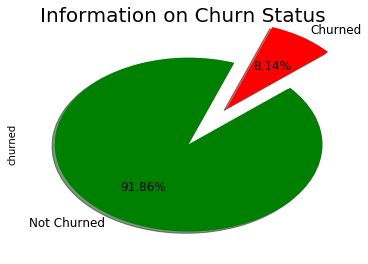

In [113]:

#f, ax = plt.plots(1,1, figsize=(16,8))

colors = ['green', 'red']
label1 = list(['Not Churned','Churned'])
plt.suptitle('Information on Churn Status', fontsize=20)
churn_df_filter["churned"].value_counts().plot.pie(explode=[0,0.50], autopct='%1.2f%%',labels=label1, shadow=True, colors=colors, fontsize=12, startangle=70)

E:\Proj\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


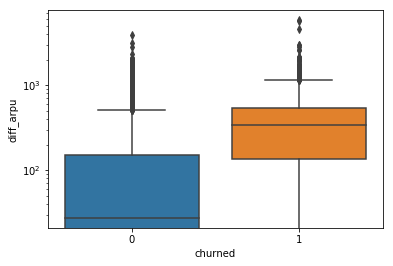

In [114]:
fig, ax = plt.subplots()
# Set the scale of the x-and y-axes
ax.set(yscale="log")
sns.boxplot(x='churned',y='diff_arpu',data=churn_df_filter)

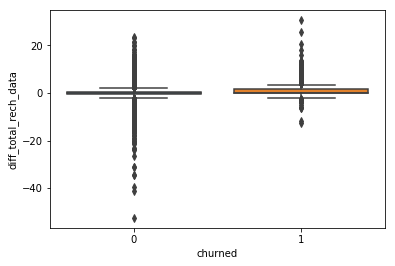

In [115]:
sns.boxplot(x='churned',y='diff_total_rech_data',data=churn_df_filter)

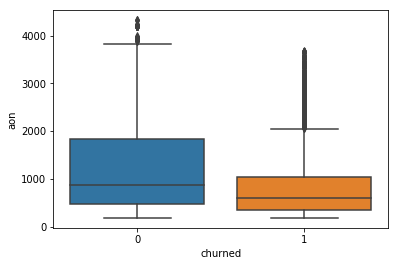

In [116]:
sns.boxplot(x='churned',y='aon',data=churn_df_filter)

In [117]:
churn_df_filter.describe()

mobile_number  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09      0.174494      0.183261      0.153628      0.132562   
std     6.908784e+05      0.434953      0.450423      0.406486      0.382178   
min     7.000000e+09      0.000000      0.000000      0.000000      0.000000   
25%     7.000609e+09      0.000000      0.000000      0.000000      0.000000   
50%     7.001203e+09      0.000000      0.000000      0.000000      0.000000   
75%     7.001804e+09      0.000000      0.000000      0.000000      0.000000   
max     7.002411e+09      4.000000      5.000000      5.000000      4.000000   

        sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_2g_9  monthly_3g_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       1.066064      1.214026      1.054865      0.817606      0.217759   
std        2.507197      2.736158      2.535940      1.979713      0.613199   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      0.000000   
max       42.000000     48.000000     44.000000     40.000000     14.000000   

       monthly_3g_7  monthly_3g_8  monthly_3g_9   sachet_3g_6   sachet_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       0.229026      0.211026      0.219226      0.209393      0.227492   
std        0.659125      0.617549      0.615390      0.985674      1.089929   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     16.000000     11.000000     29.000000     35.000000   

        sachet_3g_8   sachet_3g_9           aon     diff_arpu  diff_onnet_mou  \
count  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000   
mean       0.202393      0.194427   1209.368754     51.038561       30.193604   
std        1.100107      1.051711    957.677989    334.872298      308.732580   
min        0.000000      0.000000    180.000000 -12808.614000    -6359.920000   
25%        0.000000      0.000000    460.000000    -83.242000      -18.410000   
50%        0.000000      0.000000    846.000000     40.751000        3.210000   
75%        0.000000      0.000000   1756.000000    180.181000       52.340000   
max       41.000000     49.000000   4321.000000   5811.050000     5295.310000   

       diff_offnet_mou  diff_roam_ic_mou  diff_roam_og_mou  \
count     30001.000000      30001.000000      30001.000000   
mean         40.821499          1.875867          3.496209   
std         349.434879         65.972064         94.165532   
min      -12604.240000      -2330.200000      -3057.150000   
25%         -41.040000          0.000000          0.000000   
50%          11.020000          0.000000          0.000000   
75%         100.900000          0.000000          0.000000   
max        7094.390000       1296.990000       2410.840000   

       diff_loc_og_t2t_mou  diff_loc_og_t2m_mou  diff_loc_og_t2f_mou  \
count         30001.000000         30001.000000         30001.000000   
mean              7.002397            11.369818             0.497485   
std             138.240026           148.307654            14.046840   
min           -6412.690000         -3158.700000          -452.720000   
25%              -8.240000           -21.400000            -0.230000   
50%               1.030000             3.090000             0.000000   
75%              16.610000            38.820000             1.210000 

In [118]:
churn_df_filter.head()

mobile_number  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
0      7000842753             0             0             0             0   
7      7000701601             0             0             0             0   
8      7001524846             0             1             0             0   
21     7002124215             0             0             0             0   
23     7000887461             0             0             0             0   

    sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  \
0             0            0            0            0             1   
7             0            0            0            0             0   
8             0            1            3            0             0   
21            0            0            0            0             0   
23            0            0            0            0             0   

    monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0              1             1             0            0            0   
7              0             0             0            0            0   
8              0             0             0            0            0   
21             0             0             0            0            0   
23             2             1             1            0            0   

    sachet_3g_8  sachet_3g_9  aon churned  diff_arpu  diff_onnet_mou  \
0             0            0  968       1     -7.703            0.00   
7             0            0  802       1  -1961.970            3.97   
8             0            0  315       0    298.108          347.28   
21            0            0  720       0    -81.660           32.12   
23            1            0  604       0   -232.846           16.23   

    diff_offnet_mou  diff_roam_ic_mou  diff_roam_og_mou  diff_loc_og_t2t_mou  \
0              0.00              0.00               0.0                 0.00   
7            184.38             -6.78             -19.9                 1.10   
8            -48.84              0.00               0.0               244.87   
21          -156.09              0.00               0.0               -18.02   
23          -118.51              0.00               0.0                16.23   

    diff_loc_og_t2m_mou  diff_loc_og_t2f_mou  diff_loc_og_t2c_mou  \
0                  0.00                 0.00                 0.00   
7                215.72                 5.41                 0.00   
8                 25.23                 0.00                -7.15   
21               -14.94                -1.20                 0.00   
23               -65.58                 0.00               -17.71   

    diff_loc_og_mou  diff_std_og_t2t_mou  diff_std_og_t2m_mou  \
0              0.00                 0.00                 0.00   
7            222.25                 1.79                -8.31   
8            270.10               102.42               -63.83   
21           -34.18                50.15              -139.94   
23           -49.34                 0.00               -35.26   

    diff_std_og_t2f_mou  diff_std_og_mou  diff_isd_og_mou  diff_spl_og_mou  \
0                  0.00             0.00             0.00             0.00   
7                 -3.31            -9.84            -9.92            -4.25   
8                  0.00            38.59             0.00           -10.23   
21                 0.00           -89.80             0.00             0.00   
23                 0.00           -35.26             0.00           -17.66   

    diff_og_others  diff_total_og_mou  diff_loc_ic_t2t_mou  \
0              0.0               0.00                -0.16   
7              0.0             198.22                17.89   
8              0.0             298.45                16.53   
21             0.0            -123.98               -13.20   
23             0.0            -102.27               -35.76   

    diff_loc_ic_t2m_mou  diff_loc_ic_t2f_mou  diff_loc_ic_mou  \
0                 -4.13             

In [119]:
churn_df_filter.reset_index(drop=True, inplace=True)

In [120]:
churn_df_filter.head()

mobile_number  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
0     7000842753             0             0             0             0   
1     7000701601             0             0             0             0   
2     7001524846             0             1             0             0   
3     7002124215             0             0             0             0   
4     7000887461             0             0             0             0   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  \
0            0            0            0            0             1   
1            0            0            0            0             0   
2            0            1            3            0             0   
3            0            0            0            0             0   
4            0            0            0            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0             1             1             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             2             1             1            0            0   

   sachet_3g_8  sachet_3g_9  aon churned  diff_arpu  diff_onnet_mou  \
0            0            0  968       1     -7.703            0.00   
1            0            0  802       1  -1961.970            3.97   
2            0            0  315       0    298.108          347.28   
3            0            0  720       0    -81.660           32.12   
4            1            0  604       0   -232.846           16.23   

   diff_offnet_mou  diff_roam_ic_mou  diff_roam_og_mou  diff_loc_og_t2t_mou  \
0             0.00              0.00               0.0                 0.00   
1           184.38             -6.78             -19.9                 1.10   
2           -48.84              0.00               0.0               244.87   
3          -156.09              0.00               0.0               -18.02   
4          -118.51              0.00               0.0                16.23   

   diff_loc_og_t2m_mou  diff_loc_og_t2f_mou  diff_loc_og_t2c_mou  \
0                 0.00                 0.00                 0.00   
1               215.72                 5.41                 0.00   
2                25.23                 0.00                -7.15   
3               -14.94                -1.20                 0.00   
4               -65.58                 0.00               -17.71   

   diff_loc_og_mou  diff_std_og_t2t_mou  diff_std_og_t2m_mou  \
0             0.00                 0.00                 0.00   
1           222.25                 1.79                -8.31   
2           270.10               102.42               -63.83   
3           -34.18                50.15              -139.94   
4           -49.34                 0.00               -35.26   

   diff_std_og_t2f_mou  diff_std_og_mou  diff_isd_og_mou  diff_spl_og_mou  \
0                 0.00             0.00             0.00             0.00   
1                -3.31            -9.84            -9.92            -4.25   
2                 0.00            38.59             0.00           -10.23   
3                 0.00           -89.80             0.00             0.00   
4                 0.00           -35.26             0.00           -17.66   

   diff_og_others  diff_total_og_mou  diff_loc_ic_t2t_mou  \
0             0.0               0.00                -0.16   
1             0.0             198.22                17.89   
2             0.0             298.45                16.53   
3             0.0            -123.98               -13.20   
4             0.0            -102.27               -35.76   

   diff_loc_ic_t2m_mou  diff_loc_ic_t2f_mou  diff_loc_ic_mou  \
0                -4.13                -1.15            -5.44   
1                98.33    

In [121]:
# Standardize continuous variables before we apply PCA
from sklearn import preprocessing
churn_scaler = preprocessing.StandardScaler().fit(churn_df_filter.drop('churned', axis=1))
churn_df_std = churn_scaler.transform(churn_df_filter.drop('churned', axis=1)) 

In [122]:
churn_df_std = pd.DataFrame(churn_df_std)

In [123]:
churn_df_std.reset_index(drop=True, inplace=True)

In [124]:
churn_df_std.shape

(30001, 61)

In [125]:
churn_df_filter.columns

Index(['mobile_number', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'churned', 'diff_arpu', 'diff_onnet_mou',
       'diff_offnet_mou', 'diff_roam_ic_mou', 'diff_roam_og_mou',
       'diff_loc_og_t2t_mou', 'diff_loc_og_t2m_mou', 'diff_loc_og_t2f_mou',
       'diff_loc_og_t2c_mou', 'diff_loc_og_mou', 'diff_std_og_t2t_mou',
       'diff_std_og_t2m_mou', 'diff_std_og_t2f_mou', 'diff_std_og_mou',
       'diff_isd_og_mou', 'diff_spl_og_mou', 'diff_og_others',
       'diff_total_og_mou', 'diff_loc_ic_t2t_mou', 'diff_loc_ic_t2m_mou',
       'diff_loc_ic_t2f_mou', 'diff_loc_ic_mou', 'diff_std_ic_t2t_mou',
       'diff_std_ic_t2m_mou', 'diff_std_ic_t2f_mou', 'diff_std_ic_mou',
       'diff_total_ic_mou', 'diff_spl_ic_mou', 'diff_isd_ic_mou',
       'diff_ic_ot

In [126]:
churn_df_filter_cols = list(churn_df_filter.columns)
churn_df_filter_cols.remove('churned')

In [127]:
churn_df_std.columns = churn_df_filter_cols

In [128]:
churn_df_std.head()

mobile_number  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
0      -0.526015     -0.401186     -0.406870     -0.377948     -0.346866   
1      -0.730327     -0.401186     -0.406870     -0.377948     -0.346866   
2       0.461285     -0.401186      1.813301     -0.377948     -0.346866   
3       1.328846     -0.401186     -0.406870     -0.377948     -0.346866   
4      -0.461302     -0.401186     -0.406870     -0.377948     -0.346866   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  \
0    -0.425209    -0.443705    -0.415973    -0.412999      1.275694   
1    -0.425209    -0.443705    -0.415973    -0.412999     -0.355126   
2    -0.425209    -0.078223     0.767040    -0.412999     -0.355126   
3    -0.425209    -0.443705    -0.415973    -0.412999     -0.355126   
4    -0.425209    -0.443705    -0.415973    -0.412999     -0.355126   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0      1.169713      1.277611     -0.356245     -0.21244    -0.208726   
1     -0.347475     -0.341722     -0.356245     -0.21244    -0.208726   
2     -0.347475     -0.341722     -0.356245     -0.21244    -0.208726   
3     -0.347475     -0.341722     -0.356245     -0.21244    -0.208726   
4      2.686902      1.277611      1.268767     -0.21244    -0.208726   

   sachet_3g_8  sachet_3g_9       aon  diff_arpu  diff_onnet_mou  \
0    -0.183979     -0.18487 -0.252040  -0.175418       -0.097800   
1    -0.183979     -0.18487 -0.425378  -6.011372       -0.084941   
2    -0.183979     -0.18487 -0.933909   0.737814        1.027076   
3    -0.183979     -0.18487 -0.511004  -0.396273        0.006240   
4     0.725039     -0.18487 -0.632132  -0.847754       -0.045230   

   diff_offnet_mou  diff_roam_ic_mou  diff_roam_og_mou  diff_loc_og_t2t_mou  \
0        -0.116823         -0.028435         -0.037129            -0.050655   
1         0.410837         -0.131207         -0.248462            -0.042697   
2        -0.256594         -0.028435         -0.037129             1.720714   
3        -0.563524         -0.028435         -0.037129            -0.181010   
4        -0.455977         -0.028435         -0.037129             0.066752   

   diff_loc_og_t2m_mou  diff_loc_og_t2f_mou  diff_loc_og_t2c_mou  \
0            -0.076665            -0.035417            -0.003543   
1             1.377903             0.349730            -0.003543   
2             0.093457            -0.035417            -1.028745   
3            -0.177403            -0.120847            -0.003543   
4            -0.518861            -0.035417            -2.542890   

   diff_loc_og_mou  diff_std_og_t2t_mou  diff_std_og_t2m_mou  \
0        -0.088276            -0.079174            -0.086672   
1         0.951425            -0.072618            -0.114029   
2         1.175271             0.295920            -0.296808   
3        -0.248172             0.104491            -0.547372   
4        -0.319092            -0.079174            -0.202752   

   diff_std_og_t2f_mou  diff_std_og_mou  diff_isd_og_mou  diff_spl_og_mou  \
0            -0.030526        -0.112575        -0.013544         0.005184   
1            -0.469715        -0.135568        -0.722062        -0.229780   
2            -0.030526        -0.022400        -0.013544        -0.560388   
3            -0.030526        -0.322415        -0.013544         0.005184   
4            -0.030526        -0.194969        -0.013544        -0.971160   

   diff_og_others  diff_total_og_mou  diff_loc_ic_t2t_mou  \
0       -0.088708          -0.134171            -0.035137   
1       -0.088708           0.260201             0.141739   
2       -0.088708           0.459615             0.128412   
3       -0.088708          -0.380838            -0.162918   
4       -0.088708          -0.337644            -0.383988   

   diff_loc_ic_t2m_mou  diff_loc_ic_t2f_mou  diff_loc_ic_mou  \
0            -0.066080            -0.081488        -0.082445   
1             0.693282             2.916217 

In [129]:
churn_df_cat = churn_df_cat.astype('object')
churn_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
night_pck_user_good      30001 non-null object
night_pck_user_action    30001 non-null object
fb_user_good             30001 non-null object
fb_user_action           30001 non-null object
dtypes: object(4)
memory usage: 2.4+ MB


In [130]:
# # Putting feature variable to X
# X = churn_df_filter.drop(['mobile_number','churned'],axis=1)

# # Putting response variable to y
# y = churn_df_filter['churned']

# y.head()

In [131]:
churn_df_cat.reset_index(drop=True,inplace=True)

In [132]:
churn_df_std.reset_index(drop=True,inplace=True)

In [133]:
churn_df_std = pd.concat([churn_df_std, churn_df_cat], axis=1)

In [134]:
churn_df_cat['fb_user_good'].isnull().sum()

0

In [135]:
churn_df_std[['fb_user_good','fb_user_action','night_pck_user_good', 'night_pck_user_action']].isnull().sum()

fb_user_good             0
fb_user_action           0
night_pck_user_good      0
night_pck_user_action    0
dtype: int64

In [136]:
churn_df_std.isnull().any().any()

False

In [137]:
churn_df_std.drop(columns=['mobile_number'], inplace=True)

In [138]:
churn_df_std.head(10)

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  \
0     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
1     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
2     -0.401186      1.813301     -0.377948     -0.346866    -0.425209   
3     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
4     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
5     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
6     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
7     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
8     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
9     -0.401186     -0.406870     -0.377948     -0.346866     1.170225   

   sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  \
0    -0.443705    -0.415973    -0.412999      1.275694      1.169713   
1    -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
2    -0.078223     0.767040    -0.412999     -0.355126     -0.347475   
3    -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
4    -0.443705    -0.415973    -0.412999     -0.355126      2.686902   
5    -0.443705    -0.415973    -0.412999      6.168154      7.238468   
6    -0.443705    -0.415973     1.102397     -0.355126     -0.347475   
7    -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
8    -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
9     1.383706    -0.021635     0.597265     -0.355126     -0.347475   

   monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
0      1.277611     -0.356245    -0.212440    -0.208726    -0.183979   
1     -0.341722     -0.356245    -0.212440    -0.208726    -0.183979   
2     -0.341722     -0.356245    -0.212440    -0.208726    -0.183979   
3     -0.341722     -0.356245    -0.212440    -0.208726    -0.183979   
4      1.277611      1.268767    -0.212440    -0.208726     0.725039   
5      1.277611      2.893780     0.802111     2.543793    -0.183979   
6     -0.341722     -0.356245    -0.212440    -0.208726    -0.183979   
7     -0.341722     -0.356245    -0.212440    -0.208726    -0.183979   
8     -0.341722     -0.356245    -0.212440    -0.208726    -0.183979   
9     -0.341722     -0.356245    -0.212440    -0.208726    -0.183979   

   sachet_3g_9       aon  diff_arpu  diff_onnet_mou  diff_offnet_mou  \
0     -0.18487 -0.252040  -0.175418       -0.097800        -0.116823   
1     -0.18487 -0.425378  -6.011372       -0.084941         0.410837   
2     -0.18487 -0.933909   0.737814        1.027076        -0.256594   
3     -0.18487 -0.511004  -0.396273        0.006240        -0.563524   
4     -0.18487 -0.632132  -0.847754       -0.045230        -0.455977   
5     -0.18487  0.123876   3.612367       -0.097800        -0.116823   
6     -0.18487 -0.056772  -0.058762       -0.848948        -0.197212   
7     -0.18487  0.836027   0.518094       -0.025892         0.226251   
8     -0.18487  0.058091   2.969371        4.160487         1.614114   
9     -0.18487 -0.535020   0.903737       -0.017892         0.598343   

   diff_roam_ic_mou  diff_roam_og_mou  diff_loc_og_t2t_mou  \
0         -0.028435         -0.037129            -0.050655   
1         -0.131207         -0.248462            -0.042697   
2         -0.028435         -0.037129             1.720714   
3         -0.028435         -0.037129            -0.181010   
4         -0.028435         -0.037129             0.066752   
5         -0.028435         -0.037129            -0.050655   
6         -0.028435         -0.037129             0.051488   
7         -0.028435         -0.037129             0.109938   
8         -0.028435         -0.037129             2.506968   
9         -0.028435         -0.037129             0.009893   

   diff_loc_og_t2m_mou  diff_loc_og_t2f_mou  diff_loc_og_t2c_mou  \
0            -0.076665            -0.035417            -0.

# PCA for Feature extraction

In [139]:
churn_df_std.head()

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  \
0     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
1     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
2     -0.401186      1.813301     -0.377948     -0.346866    -0.425209   
3     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
4     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   

   sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  \
0    -0.443705    -0.415973    -0.412999      1.275694      1.169713   
1    -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
2    -0.078223     0.767040    -0.412999     -0.355126     -0.347475   
3    -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
4    -0.443705    -0.415973    -0.412999     -0.355126      2.686902   

   monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
0      1.277611     -0.356245     -0.21244    -0.208726    -0.183979   
1     -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
2     -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
3     -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
4      1.277611      1.268767     -0.21244    -0.208726     0.725039   

   sachet_3g_9       aon  diff_arpu  diff_onnet_mou  diff_offnet_mou  \
0     -0.18487 -0.252040  -0.175418       -0.097800        -0.116823   
1     -0.18487 -0.425378  -6.011372       -0.084941         0.410837   
2     -0.18487 -0.933909   0.737814        1.027076        -0.256594   
3     -0.18487 -0.511004  -0.396273        0.006240        -0.563524   
4     -0.18487 -0.632132  -0.847754       -0.045230        -0.455977   

   diff_roam_ic_mou  diff_roam_og_mou  diff_loc_og_t2t_mou  \
0         -0.028435         -0.037129            -0.050655   
1         -0.131207         -0.248462            -0.042697   
2         -0.028435         -0.037129             1.720714   
3         -0.028435         -0.037129            -0.181010   
4         -0.028435         -0.037129             0.066752   

   diff_loc_og_t2m_mou  diff_loc_og_t2f_mou  diff_loc_og_t2c_mou  \
0            -0.076665            -0.035417            -0.003543   
1             1.377903             0.349730            -0.003543   
2             0.093457            -0.035417            -1.028745   
3            -0.177403            -0.120847            -0.003543   
4            -0.518861            -0.035417            -2.542890   

   diff_loc_og_mou  diff_std_og_t2t_mou  diff_std_og_t2m_mou  \
0        -0.088276            -0.079174            -0.086672   
1         0.951425            -0.072618            -0.114029   
2         1.175271             0.295920            -0.296808   
3        -0.248172             0.104491            -0.547372   
4        -0.319092            -0.079174            -0.202752   

   diff_std_og_t2f_mou  diff_std_og_mou  diff_isd_og_mou  diff_spl_og_mou  \
0            -0.030526        -0.112575        -0.013544         0.005184   
1            -0.469715        -0.135568        -0.722062        -0.229780   
2            -0.030526        -0.022400        -0.013544        -0.560388   
3            -0.030526        -0.322415        -0.013544         0.005184   
4            -0.030526        -0.194969        -0.013544        -0.971160   

   diff_og_others  diff_total_og_mou  diff_loc_ic_t2t_mou  \
0       -0.088708          -0.134171            -0.035137   
1       -0.088708           0.260201             0.141739   
2       -0.088708           0.459615             0.128412   
3       -0.088708          -0.380838            -0.162918   
4       -0.088708          -0.337644            -0.383988   

   diff_loc_ic_t2m_mou  diff_loc_ic_t2f_mou  diff_loc_ic_mou  \
0            -0.066080            -0.081488        -0.082445   
1             0.693282             2.916217         1.073318   
2             0.114978            -0.042504         0.151407   
3     

In [140]:
# Checking the outliers in the data now
churn_df_std.describe(percentiles=[.25,.5,.75,.90,.95,.99])

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9   sachet_2g_6  \
count  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04   
mean  -8.176557e-16  2.127701e-15  5.542604e-16 -1.367729e-15  5.658922e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -4.011861e-01 -4.068698e-01 -3.779484e-01 -3.468658e-01 -4.252089e-01   
25%   -4.011861e-01 -4.068698e-01 -3.779484e-01 -3.468658e-01 -4.252089e-01   
50%   -4.011861e-01 -4.068698e-01 -3.779484e-01 -3.468658e-01 -4.252089e-01   
75%   -4.011861e-01 -4.068698e-01 -3.779484e-01 -3.468658e-01 -2.635037e-02   
90%    1.897951e+00  1.813301e+00  2.082202e+00  2.269760e+00  1.170225e+00   
95%    1.897951e+00  1.813301e+00  2.082202e+00  2.269760e+00  1.967942e+00   
99%    4.197089e+00  4.033472e+00  4.542351e+00  4.886386e+00  4.361093e+00   
max    8.795363e+00  1.069399e+01  1.192280e+01  1.011964e+01  1.632685e+01   

        sachet_2g_7   sachet_2g_8   sachet_2g_9  monthly_3g_6  monthly_3g_7  \
count  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04   
mean  -1.134288e-15  1.418363e-15  1.987455e-16 -1.242949e-15  4.468869e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -4.437049e-01 -4.159730e-01 -4.129991e-01 -3.551264e-01 -3.474752e-01   
25%   -4.437049e-01 -4.159730e-01 -4.129991e-01 -3.551264e-01 -3.474752e-01   
50%   -4.437049e-01 -4.159730e-01 -4.129991e-01 -3.551264e-01 -3.474752e-01   
75%   -7.822275e-02 -2.163528e-02  9.213302e-02 -3.551264e-01 -3.474752e-01   
90%    1.383706e+00  1.161378e+00  1.102397e+00  1.275694e+00  1.169713e+00   
95%    2.114670e+00  1.950053e+00  2.112661e+00  1.275694e+00  1.169713e+00   
99%    3.942081e+00  4.316080e+00  4.133190e+00  4.537334e+00  4.204091e+00   
max    1.709944e+01  1.693489e+01  1.979228e+01  2.247635e+01  2.392754e+01   

       monthly_3g_8  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8  \
count  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04   
mean  -1.023769e-15  1.826626e-15  6.558498e-16  1.534185e-15 -1.824754e-15   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -3.417217e-01 -3.562450e-01 -2.124399e-01 -2.087257e-01 -1.839790e-01   
25%   -3.417217e-01 -3.562450e-01 -2.124399e-01 -2.087257e-01 -1.839790e-01   
50%   -3.417217e-01 -3.562450e-01 -2.124399e-01 -2.087257e-01 -1.839790e-01   
75%   -3.417217e-01 -3.562450e-01 -2.124399e-01 -2.087257e-01 -1.839790e-01   
90%    1.277611e+00  1.268767e+00  8.021113e-01  7.087805e-01 -1.839790e-01   
95%    1.277611e+00  1.268767e+00  8.021113e-01  7.087805e-01  7.250385e-01   
99%    4.516276e+00  4.518793e+00  3.845765e+00  4.378805e+00  3.452091e+00   
max    2.556760e+01  1.751889e+01  2.920954e+01  3.190399e+01  3.708574e+01   

        sachet_3g_9           aon     diff_arpu  diff_onnet_mou  \
count  3.000100e+04  3.000100e+04  3.000100e+04    3.000100e+04   
mean   6.792044e-16 -9.309650e-17  3.524471e-17    2.655149e-17   
std    1.000017e+00  1.000017e+00  1.000017e+00    1.000017e+00   
min   -1.848702e-01 -1.074877e+00 -3.840230e+01   -2.069824e+01   
25%   -1.848702e-01 -7.824981e-01 -4.009970e-01   -1.574321e-01   
50%   -1.848702e-01 -3.794332e-01 -3.072136e-02   -8.740268e-02   
75%   -1.848702e-01  5.707977e-01  3.856533e-01    7.173446e-02   
90%   -1.848702e-01  1.653643e+00  9.988674e-01    5.989633e-01   
95%    7.659768e-01  2.015984e+00  1.455882e+00    1.342078e+00   
99%    3.618518e+00  2.549575e+00  2.703256e+00    3.517460e+00   
max    4.640663e+01  3.249196e+00  1.720091e+01    1.705425e+01   

       diff_offnet_mou  diff_roam_ic_mou  diff_roam_og_mou  \
count     3.000100e+04      3.000100e+04      3.000100e+04   
mean      6.240217e-17     -8.601855e-16     -8.115858e-16   
std       1.000017e+00      1.000017e+00      1.000017e+00   
min      -3.618778e+01     -3.535003e+01     -3.250337e+01   
25%      -2.342722e-01     -2.843474e-02     

In [141]:
pd.set_option('display.max_rows', 200)

In [142]:
# Before applying PCA, let's see if any of the columns seem to be different
pd.set_option('display.max_rows', 200)
churn_df_std.dtypes

monthly_2g_6             float64
monthly_2g_7             float64
monthly_2g_8             float64
monthly_2g_9             float64
sachet_2g_6              float64
sachet_2g_7              float64
sachet_2g_8              float64
sachet_2g_9              float64
monthly_3g_6             float64
monthly_3g_7             float64
monthly_3g_8             float64
monthly_3g_9             float64
sachet_3g_6              float64
sachet_3g_7              float64
sachet_3g_8              float64
sachet_3g_9              float64
aon                      float64
diff_arpu                float64
diff_onnet_mou           float64
diff_offnet_mou          float64
diff_roam_ic_mou         float64
diff_roam_og_mou         float64
diff_loc_og_t2t_mou      float64
diff_loc_og_t2m_mou      float64
diff_loc_og_t2f_mou      float64
diff_loc_og_t2c_mou      float64
diff_loc_og_mou          float64
diff_std_og_t2t_mou      float64
diff_std_og_t2m_mou      float64
diff_std_og_t2f_mou      float64
diff_std_o

In [143]:
from sklearn.model_selection import train_test_split



In [144]:
# Putting feature variable to X
X = churn_df_std

# Putting response variable to y
y = churn_df_filter['churned']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churned, dtype: object

In [145]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [146]:
y_train_df = pd.DataFrame(y_train)

In [147]:
y_train_df.groupby('churned').size()

churned
0    19309
1     1691
dtype: int64

In [148]:
y_test_df = pd.DataFrame(y_test)
y_test_df.groupby('churned').size()

churned
0    8251
1     750
dtype: int64

In [149]:
750/(8251+750)

0.08332407510276636

In [150]:
1691/(1691+19309)

0.08052380952380953

In [151]:
# # Standardize continuous variables before we apply PCA
# from sklearn import preprocessing
# X_scaler = preprocessing.StandardScaler().fit(X_train)
# Xtrain=X_scaler.transform(X_train) 

In [152]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [153]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [154]:
#Let's plot the principal components and try to make sense of them
#We'll plot original features on the first 2 principal components as axes

In [155]:
pca.components_

array([[ 1.47123246e-02,  2.18283210e-02,  4.16957910e-02, ...,
         2.10183254e-03,  1.79021794e-02,  5.15758480e-02],
       [-2.53732049e-02, -3.32850222e-02, -1.27202102e-02, ...,
         2.60428843e-03, -1.74404352e-02,  2.35934104e-02],
       [-1.12626602e-01, -1.16133567e-01, -1.17182383e-01, ...,
         9.66568918e-03,  4.33890026e-02,  2.99442114e-02],
       ...,
       [ 4.30865211e-08, -1.00051278e-07,  2.17348895e-08, ...,
         6.97947835e-08,  4.28744883e-07, -3.05555362e-07],
       [ 0.00000000e+00,  3.17844100e-16, -3.62423014e-16, ...,
        -3.11762601e-16,  9.69648594e-17, -1.64397152e-17],
       [ 5.21723576e-02,  5.40280085e-02, -9.75155339e-02, ...,
         1.38777878e-17, -0.00000000e+00,  3.46944695e-16]])

In [156]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2       Feature
0  0.014712 -0.025373  monthly_2g_6
1  0.021828 -0.033285  monthly_2g_7
2  0.041696 -0.012720  monthly_2g_8
3  0.024510 -0.026489  monthly_2g_9
4  0.011071  0.003989   sachet_2g_6

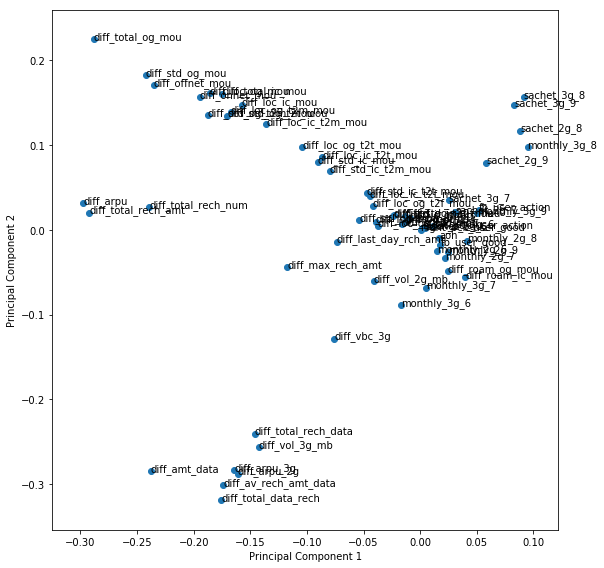

In [157]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see that the first component seems to be in a direction where outgoing calls are more
Second component seems to be capturing the heaviness in 3g data usage

#### Let's capture the scree plot now to see how many principal components shall be required to capture the required vairance


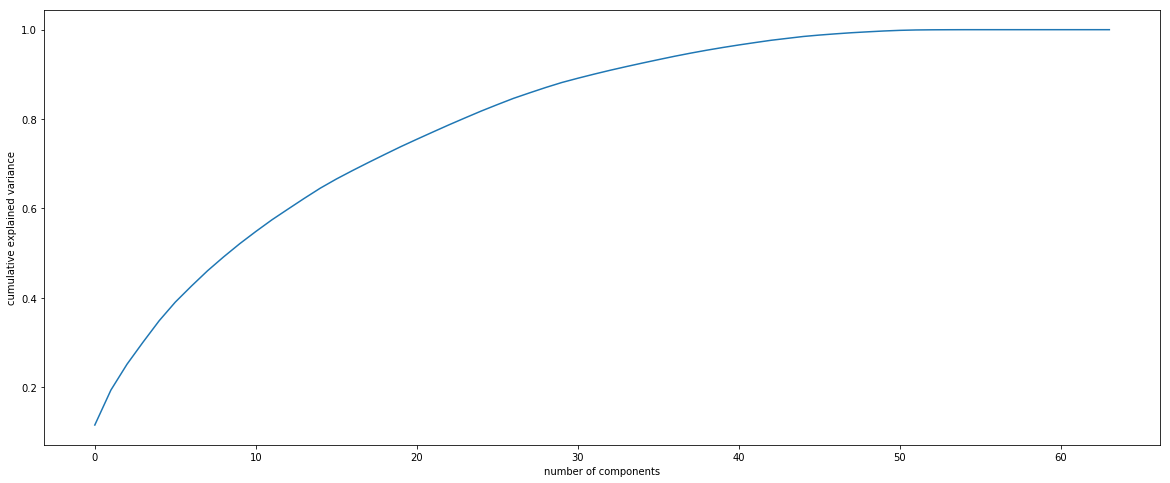

In [158]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (20,8))
line2d = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
xvalues = line2d[0].get_xdata()
yvalues = line2d[0].get_ydata()
plt.show()

In [159]:
# We are interested in knowing the number of principal components that capture more than 80% of variance
# Since the plot does not show exact no. of components that capture particular %-age of vairance, let's check the 
# cumulative variance for first 50 principal components
for i in range(1, 50):
    idx = np.where(xvalues==xvalues[i])
    print("cumulative variance for {} components = {}".format(i,yvalues[idx]))

cumulative variance for 1 components = [0.19365602]
cumulative variance for 2 components = [0.25146509]
cumulative variance for 3 components = [0.30111225]
cumulative variance for 4 components = [0.34886453]
cumulative variance for 5 components = [0.39049553]
cumulative variance for 6 components = [0.4263028]
cumulative variance for 7 components = [0.46055273]
cumulative variance for 8 components = [0.49168468]
cumulative variance for 9 components = [0.52114036]
cumulative variance for 10 components = [0.54847097]
cumulative variance for 11 components = [0.57461148]
cumulative variance for 12 components = [0.59863958]
cumulative variance for 13 components = [0.6224185]
cumulative variance for 14 components = [0.645371]
cumulative variance for 15 components = [0.66584994]
cumulative variance for 16 components = [0.68475254]
cumulative variance for 17 components = [0.70298915]
cumulative variance for 18 components = [0.72077779]
cumulative variance for 19 components = [0.73827053]
cumula

#### We see that 17 components are enough to explain 70% of the variance. Hence we will chose the same  number

In [160]:
#Using incremental PCA for 17 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=17)

In [161]:
#Basis transformation
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 17)

In [162]:
# Let's create the correlation matrix for the principal components
# Since the PCs are expected to be orthogonal and independed, we expect zero to very minor correlation among them
corrmat = np.corrcoef(df_train_pca.transpose())

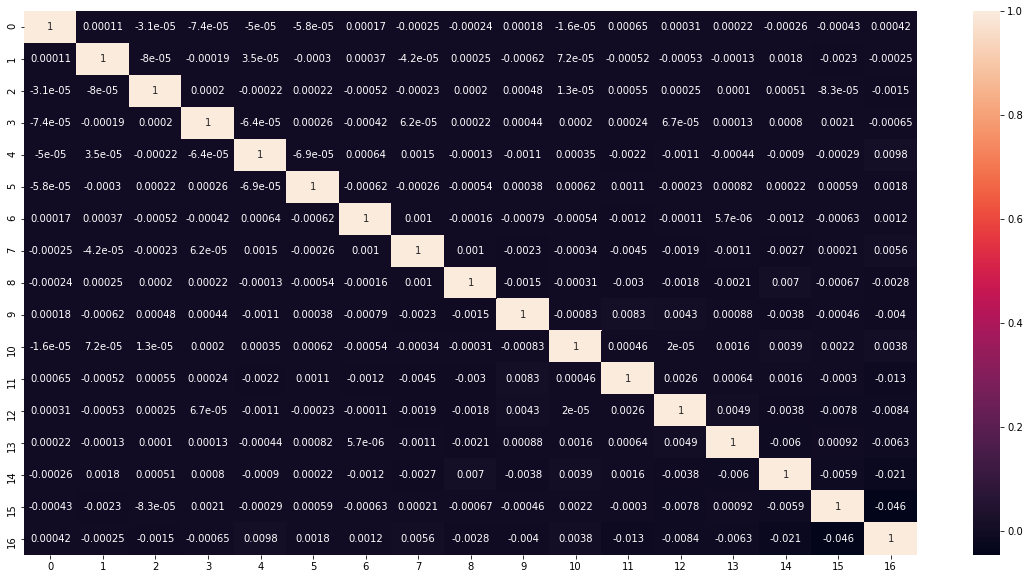

In [163]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [164]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009843938797805998 , min corr:  -0.04611834549442707


#### We can see that the PCA did a pretty good job as the correlations are very very minor

In [165]:
# Xtest=X_scaler.transform(X_test) 

In [166]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 17)

In [167]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [168]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
pred_probs_test_df = pd.DataFrame(model_pca.predict_proba(df_test_pca)[:,1])

#"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

In [169]:
pred_probs_test_df.head()

0
0  0.123047
1  0.048805
2  0.085498
3  0.091504
4  0.279074

In [170]:
y_test_df = pd.DataFrame(y_test)

In [171]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
pred_probs_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [172]:
# Appending y_test_df and pred_probs_test_df
y_pred_final = pd.concat([y_test_df,pred_probs_test_df],axis=1)


In [173]:
y_pred_final.head()

churned  CustID         0
0       1    6102  0.123047
1       1    2539  0.048805
2       0   21576  0.085498
3       0   19574  0.091504
4       1   12804  0.279074

In [174]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

y_pred_final.head()

churned  CustID  Churn_Prob
0       1    6102    0.123047
1       1    2539    0.048805
2       0   21576    0.085498
3       0   19574    0.091504
4       1   12804    0.279074

In [175]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churned','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

CustID churned  Churn_Prob
0    6102       1    0.123047
1    2539       1    0.048805
2   21576       0    0.085498
3   19574       0    0.091504
4   12804       1    0.279074

In [176]:
y_test_df.head()

churned  CustID
0       1    6102
1       1    2539
2       0   21576
3       0   19574
4       1   12804

In [177]:
len(y_pred_final.index)

9001

In [178]:
y_pred_final.isnull().sum()

CustID        0
churned       0
Churn_Prob    0
dtype: int64

In [179]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

CustID churned  Churn_Prob  predicted
0    6102       1    0.123047          0
1    2539       1    0.048805          0
2   21576       0    0.085498          0
3   19574       0    0.091504          0
4   12804       1    0.279074          0

In [180]:
y_pred_final.describe()

CustID    Churn_Prob    predicted
count   9001.000000  9.001000e+03  9001.000000
mean   14986.584046  8.163779e-02     0.020109
std     8622.856372  1.236134e-01     0.140381
min        3.000000  1.203744e-12     0.000000
25%     7587.000000  1.187394e-02     0.000000
50%    14955.000000  4.129663e-02     0.000000
75%    22509.000000  9.579366e-02     0.000000
max    29999.000000  1.000000e+00     1.000000

In [181]:
y_pred_final.isnull().sum()

CustID        0
churned       0
Churn_Prob    0
predicted     0
dtype: int64

In [182]:
y_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9001 entries, 0 to 9000
Data columns (total 4 columns):
CustID        9001 non-null int64
churned       9001 non-null object
Churn_Prob    9001 non-null float64
predicted     9001 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 281.4+ KB


In [183]:
y_pred_final['churned'] = y_pred_final['churned'].astype('int')

In [184]:
from sklearn import metrics

In [185]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churned, y_pred_final.predicted )
confusion

array([[8173,   78],
       [ 647,  103]], dtype=int64)

In [186]:
y_pred_final[(y_pred_final['churned'] == 1) 
             & (y_pred_final['predicted'] == 0)].count()

CustID        647
churned       647
Churn_Prob    647
predicted     647
dtype: int64

In [187]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churned, y_pred_final.predicted)

0.9194533940673258

In [188]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

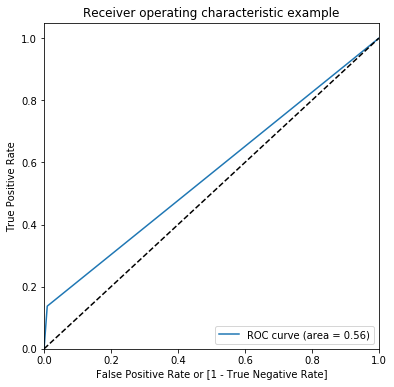

(array([0.       , 0.0094534, 1.       ]),
 array([0.        , 0.13733333, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [189]:
draw_roc(y_pred_final.churned, y_pred_final.predicted)

In [190]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churned, y_pred_final.Churn_Prob))

'0.86'

In [191]:
tn, fp, fn, tp = confusion.ravel()

In [192]:
print('tn = ', tn)
print('fp = ', fp)
print('fn = ', fn)
print('tp = ', tp)

tn =  8173
fp =  78
fn =  647
tp =  103


In [193]:
confusion

array([[8173,   78],
       [ 647,  103]], dtype=int64)

In [195]:
#### Decision Trees

In [ ]:
# If you're on windows:
# Specifing path for dot file.
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [230]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [196]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [197]:
churn_df_std.head()

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  \
0     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
1     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
2     -0.401186      1.813301     -0.377948     -0.346866    -0.425209   
3     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   
4     -0.401186     -0.406870     -0.377948     -0.346866    -0.425209   

   sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  \
0    -0.443705    -0.415973    -0.412999      1.275694      1.169713   
1    -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
2    -0.078223     0.767040    -0.412999     -0.355126     -0.347475   
3    -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
4    -0.443705    -0.415973    -0.412999     -0.355126      2.686902   

   monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
0      1.277611     -0.356245     -0.21244    -0.208726    -0.183979   
1     -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
2     -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
3     -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
4      1.277611      1.268767     -0.21244    -0.208726     0.725039   

   sachet_3g_9       aon  diff_arpu  diff_onnet_mou  diff_offnet_mou  \
0     -0.18487 -0.252040  -0.175418       -0.097800        -0.116823   
1     -0.18487 -0.425378  -6.011372       -0.084941         0.410837   
2     -0.18487 -0.933909   0.737814        1.027076        -0.256594   
3     -0.18487 -0.511004  -0.396273        0.006240        -0.563524   
4     -0.18487 -0.632132  -0.847754       -0.045230        -0.455977   

   diff_roam_ic_mou  diff_roam_og_mou  diff_loc_og_t2t_mou  \
0         -0.028435         -0.037129            -0.050655   
1         -0.131207         -0.248462            -0.042697   
2         -0.028435         -0.037129             1.720714   
3         -0.028435         -0.037129            -0.181010   
4         -0.028435         -0.037129             0.066752   

   diff_loc_og_t2m_mou  diff_loc_og_t2f_mou  diff_loc_og_t2c_mou  \
0            -0.076665            -0.035417            -0.003543   
1             1.377903             0.349730            -0.003543   
2             0.093457            -0.035417            -1.028745   
3            -0.177403            -0.120847            -0.003543   
4            -0.518861            -0.035417            -2.542890   

   diff_loc_og_mou  diff_std_og_t2t_mou  diff_std_og_t2m_mou  \
0        -0.088276            -0.079174            -0.086672   
1         0.951425            -0.072618            -0.114029   
2         1.175271             0.295920            -0.296808   
3        -0.248172             0.104491            -0.547372   
4        -0.319092            -0.079174            -0.202752   

   diff_std_og_t2f_mou  diff_std_og_mou  diff_isd_og_mou  diff_spl_og_mou  \
0            -0.030526        -0.112575        -0.013544         0.005184   
1            -0.469715        -0.135568        -0.722062        -0.229780   
2            -0.030526        -0.022400        -0.013544        -0.560388   
3            -0.030526        -0.322415        -0.013544         0.005184   
4            -0.030526        -0.194969        -0.013544        -0.971160   

   diff_og_others  diff_total_og_mou  diff_loc_ic_t2t_mou  \
0       -0.088708          -0.134171            -0.035137   
1       -0.088708           0.260201             0.141739   
2       -0.088708           0.459615             0.128412   
3       -0.088708          -0.380838            -0.162918   
4       -0.088708          -0.337644            -0.383988   

   diff_loc_ic_t2m_mou  diff_loc_ic_t2f_mou  diff_loc_ic_mou  \
0            -0.066080            -0.081488        -0.082445   
1             0.693282             2.916217         1.073318   
2             0.114978            -0.042504         0.151407   
3     

In [206]:
# Putting feature variable to X
X = churn_df_std.drop

# Putting response variable to y
y = churn_df_filter['churned']


In [199]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  \
28310     -0.401186      -0.40687     -0.377948     -0.346866     0.771367   
29662     -0.401186      -0.40687     -0.377948     -0.346866     2.765659   
16753     -0.401186      -0.40687     -0.377948     -0.346866     3.563376   
911       -0.401186      -0.40687     -0.377948     -0.346866    -0.425209   
2230      -0.401186      -0.40687     -0.377948     -0.346866    -0.425209   

       sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  \
28310    -0.078223     0.372702     1.607529     -0.355126     -0.347475   
29662     3.942081     3.133067     5.648586     -0.355126     -0.347475   
16753     1.383706     0.372702    -0.412999     -0.355126     -0.347475   
911      -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   
2230     -0.443705    -0.415973    -0.412999     -0.355126     -0.347475   

       monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
28310     -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
29662     -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
16753     -0.341722     -0.356245     -0.21244    -0.208726     0.725039   
911       -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   
2230      -0.341722     -0.356245     -0.21244    -0.208726    -0.183979   

       sachet_3g_9       aon  diff_arpu  diff_onnet_mou  diff_offnet_mou  \
28310     -0.18487 -0.506827   1.155461        2.279410        -0.153912   
29662     -0.18487 -0.304250   0.026851       -0.014685        -0.046738   
16753     -0.18487 -1.026843   0.675348       -0.042735         0.139938   
911       -0.18487  0.840204  -0.604135       -0.418439         0.301602   
2230      -0.18487 -0.188343  -0.475645       -0.209517        -0.588564   

       diff_roam_ic_mou  diff_roam_og_mou  diff_loc_og_t2t_mou  \
28310         -0.028435         -0.037129             0.033693   
29662         -0.028435         -0.037129             0.134968   
16753          0.179081          0.129602            -0.048991   
911           -0.620210         -0.759167            -0.489609   
2230          -0.028435         -0.037129            -0.146866   

       diff_loc_og_t2m_mou  diff_loc_og_t2f_mou  diff_loc_og_t2c_mou  \
28310            -0.081183            -0.035417            -0.003543   
29662             0.037289            -0.021178             0.987247   
16753            -0.067090             0.017977             2.687793   
911               0.799299             0.190261            -0.003543   
2230             -0.197699            -0.050367            -1.243822   

       diff_loc_og_mou  diff_std_og_t2t_mou  diff_std_og_t2m_mou  \
28310        -0.036911             2.565932            -0.127132   
29662         0.111758            -0.079174            -0.086672   
16753        -0.077002            -0.017793            -0.026064   
911           0.250416            -0.097778             0.119514   
2230         -0.235495            -0.156741            -0.522418   

       diff_std_og_t2f_mou  diff_std_og_mou  diff_isd_og_mou  diff_spl_og_mou  \
28310            -0.030526         1.546445        -0.013544         0.005184   
29662            -0.030526        -0.112575        -0.013544         0.471795   
16753             0.187079        -0.026512        -0.013544         2.870085   
911              -0.189748         0.019077        -0.013544        -0.741724   
2230             -0.030526        -0.471359        -0.013544        -0.770473   

       diff_og_others  diff_total_og_mou  diff_loc_ic_t2t_mou  \
28310       -0.088708           1.300208            -0.063653   
29662        0.242786          -0.030077             0.370158   
16753       -0.088708           0.046999            -0.033471   
911         -0.088708           0.095087            -0.502167   
2230        -0.088708          -0.530195            -0.009071   

       diff_loc_ic_t2m_mou  diff_loc_ic_t2f_mou  d

In [200]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [201]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      8267
          1       0.55      0.37      0.44       734

avg / total       0.91      0.92      0.92      9001



In [202]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[8047  220]
 [ 463  271]]
0.9241195422730808


In [207]:
### Plotting the Decision Tree
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(churn_df_std.columns[0:])
features

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'aon',
 'diff_arpu',
 'diff_onnet_mou',
 'diff_offnet_mou',
 'diff_roam_ic_mou',
 'diff_roam_og_mou',
 'diff_loc_og_t2t_mou',
 'diff_loc_og_t2m_mou',
 'diff_loc_og_t2f_mou',
 'diff_loc_og_t2c_mou',
 'diff_loc_og_mou',
 'diff_std_og_t2t_mou',
 'diff_std_og_t2m_mou',
 'diff_std_og_t2f_mou',
 'diff_std_og_mou',
 'diff_isd_og_mou',
 'diff_spl_og_mou',
 'diff_og_others',
 'diff_total_og_mou',
 'diff_loc_ic_t2t_mou',
 'diff_loc_ic_t2m_mou',
 'diff_loc_ic_t2f_mou',
 'diff_loc_ic_mou',
 'diff_std_ic_t2t_mou',
 'diff_std_ic_t2m_mou',
 'diff_std_ic_t2f_mou',
 'diff_std_ic_mou',
 'diff_total_ic_mou',
 'diff_spl_ic_mou',
 'diff_isd_ic_mou',
 'diff_ic_others',
 'diff_total_rech_num',
 'diff_total_rech_amt',
 'diff_max_rech_amt',
 'diff_la

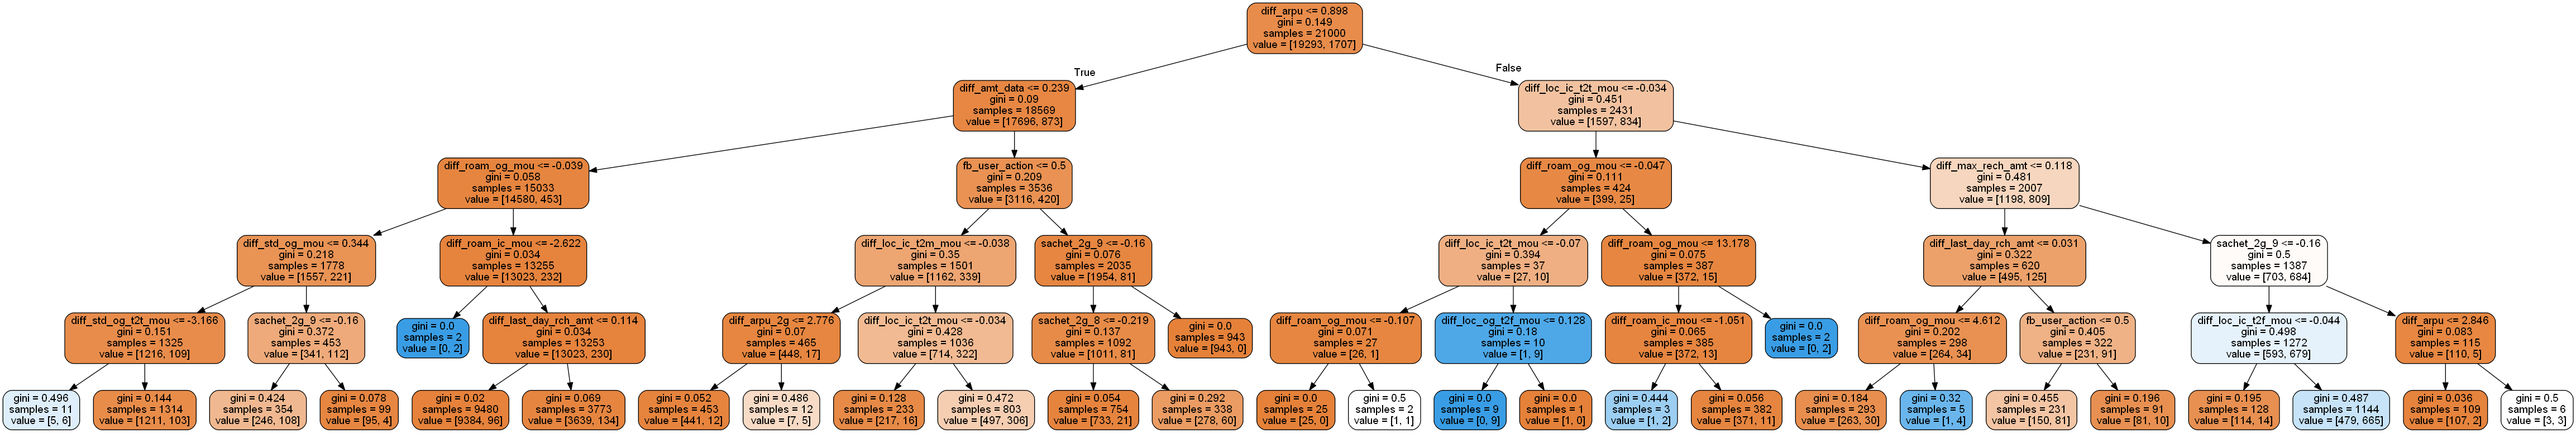

In [208]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>

## Tuning max_depth

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)

In [210]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [211]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training sc

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.185341      0.010175          0.03096        0.009878   
1       0.227402      0.007219          0.02762        0.003709   
2       0.280262      0.017723          0.02024        0.004493   
3       0.388624      0.042717          0.02860        0.009481   
4       0.402124      0.025684          0.02972        0.004548   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.918591           0.918591   
1               2  {'max_depth': 2}           0.918591           0.918591   
2               3  {'max_depth': 3}           0.918591           0.912164   
3               4  {'max_depth': 4}           0.922161           0.915972   
4               5  {'max_depth': 5}           0.925018           0.919543   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.91881           0.918790           0.918790         0.918714   
1            0.91881           0.918790           0.918790         0.918714   
2            0.91881           0.919028           0.918314         0.917381   
3            0.92000           0.923077           0.918076         0.919857   
4            0.92381           0.928316           0.919266         0.923190   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000101               13            0.918745            0.918745   
1        0.000101               13            0.918745            0.918745   
2        0.002620               16            0.918745            0.920352   
3        0.002606               11            0.923924            0.924936   
4        0.003426                6            0.928210            0.929222   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.918690            0.918695            0.918695   
1            0.918690            0.918695            0.918695   
2            0.918690            0.918755            0.918814   
3            0.923333            0.922624            0.919052   
4            0.927619            0.927385            0.924231   

   mean_train_score  std_train_score  
0          0.918714         0.000025  
1          0.918714         0.000025  
2          0.919071         0.000642  
3          0.922774         0.002009  
4          0.927333         0.001676

Now let's visualize how train and test score changes with max_depth.

E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


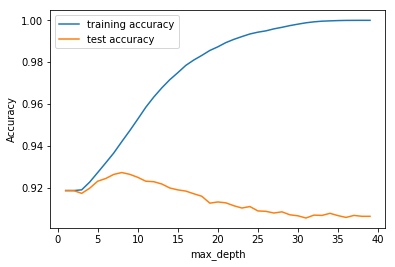

In [212]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 8, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds.

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

# Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [213]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [214]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training sc

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.047270      0.111561          0.02922        0.002550   
1       0.905868      0.110576          0.02486        0.008891   
2       0.759768      0.069100          0.02060        0.010000   
3       0.695765      0.056258          0.02198        0.005316   
4       0.687187      0.063226          0.02174        0.004367   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.918353   
1                     25  {'min_samples_leaf': 25}           0.929541   
2                     45  {'min_samples_leaf': 45}           0.926446   
3                     65  {'min_samples_leaf': 65}           0.921685   
4                     85  {'min_samples_leaf': 85}           0.926446   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.909545           0.916190           0.921172           0.923077   
1           0.925018           0.930952           0.930221           0.925697   
2           0.930017           0.924524           0.930936           0.930936   
3           0.925732           0.927857           0.926887           0.934032   
4           0.927874           0.927143           0.925697           0.926649   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.917667        0.004694               10            0.969760   
1         0.928286        0.002442                2            0.945294   
2         0.928571        0.002614                1            0.938508   
3         0.927238        0.003994                3            0.934639   
4         0.926762        0.000725                4            0.931008   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.971308            0.969940            0.970478   
1            0.948568            0.948631            0.947444   
2            0.941663            0.940119            0.941492   
3            0.936544            0.936310            0.937266   
4            0.933687            0.932738            0.934171   

   split4_train_score  mean_train_score  std_train_score  
0            0.970776          0.970452         0.000562  
1            0.947146          0.947417         0.001215  
2            0.940301          0.940417         0.001136  
3            0.937504          0.936452         0.001008  
4            0.935182          0.933357         0.001415

E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


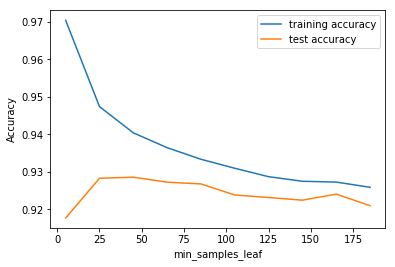

In [215]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

## Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [216]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [217]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training sc

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.442593      0.209946          0.03436        0.004610   
1       1.245112      0.026880          0.02724        0.003189   
2       1.382453      0.194792          0.03336        0.007414   
3       1.258052      0.147872          0.02598        0.006937   
4       1.174990      0.043646          0.02400        0.003000   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.905499   
1                      25  {'min_samples_split': 25}           0.916448   
2                      45  {'min_samples_split': 45}           0.921685   
3                      65  {'min_samples_split': 65}           0.927160   
4                      85  {'min_samples_split': 85}           0.926446   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.904070           0.909048           0.906644           0.917599   
1           0.910259           0.916667           0.916409           0.925458   
2           0.918829           0.921190           0.918790           0.927840   
3           0.920257           0.923571           0.930221           0.929983   
4           0.921209           0.925238           0.929983           0.929507   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.908571        0.004799               10            0.994345   
1         0.917048        0.004852                9            0.969046   
2         0.921667        0.003306                8            0.961010   
3         0.926238        0.003837                7            0.954045   
4         0.926476        0.003186                6            0.951485   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.993273            0.992738            0.993988   
1            0.972736            0.969643            0.971728   
2            0.965176            0.961607            0.963276   
3            0.962557            0.954881            0.959705   
4            0.959998            0.952738            0.957205   

   split4_train_score  mean_train_score  std_train_score  
0            0.992679          0.993405         0.000665  
1            0.971073          0.970845         0.001348  
2            0.961669          0.962548         0.001514  
3            0.958931          0.958024         0.003159  
4            0.954824          0.955250         0.003067

E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


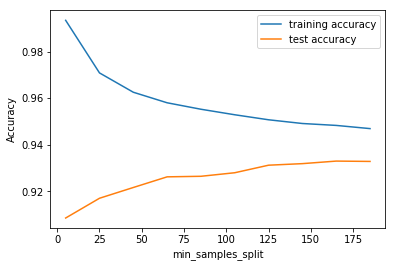

In [218]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

##Grid Search to Find Optimal Hyperparameters

In [219]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   55.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [220]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Proj\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training sc

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.572984      0.048788          0.02786        0.007031   
1        0.497265      0.024614          0.02286        0.005313   
2        0.513125      0.069299          0.02410        0.006204   
3        0.464044      0.017851          0.02560        0.005932   
4        0.689645      0.052606          0.02324        0.010934   
5        0.669026      0.028507          0.02336        0.004413   
6        0.665746      0.027177          0.02348        0.005062   
7        0.677667      0.049505          0.02910        0.004392   
8        0.406783      0.038068          0.02686        0.005971   
9        0.419944      0.038593          0.02974        0.001993   
10       0.399704      0.033512          0.02036        0.006041   
11       0.421884      0.037105          0.02748        0.003424   
12       0.653566      0.062634          0.02730        0.004318   
13       0.600106      0.028880          0.02186        0.008393   
14       0.612686      0.051449          0.02886        0.006357   
15       0.613785      0.049347          0.02760        0.012959   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.920495           0.912402           0.920238   
1            0.920495           0.912402           0.920238   
2            0.920495           0.912402           0.920238   
3            0.920495           0.912402           0.920238   
4            0.932873           0.930017           0.937857   
5            0.932873           0.930017           0.

In [221]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9335238095238095
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


**Running the model with best parameters obtained from grid search.**

In [222]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [223]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9303410732140873

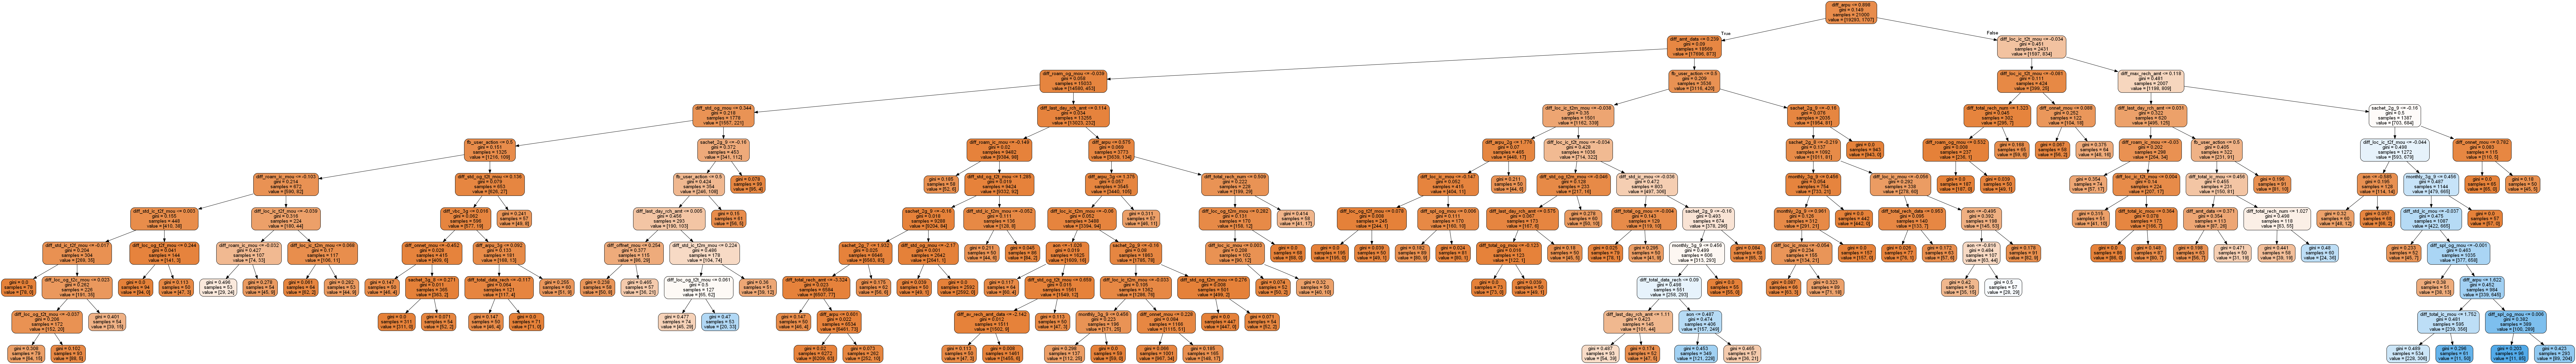

In [224]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [225]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.9184535051660927


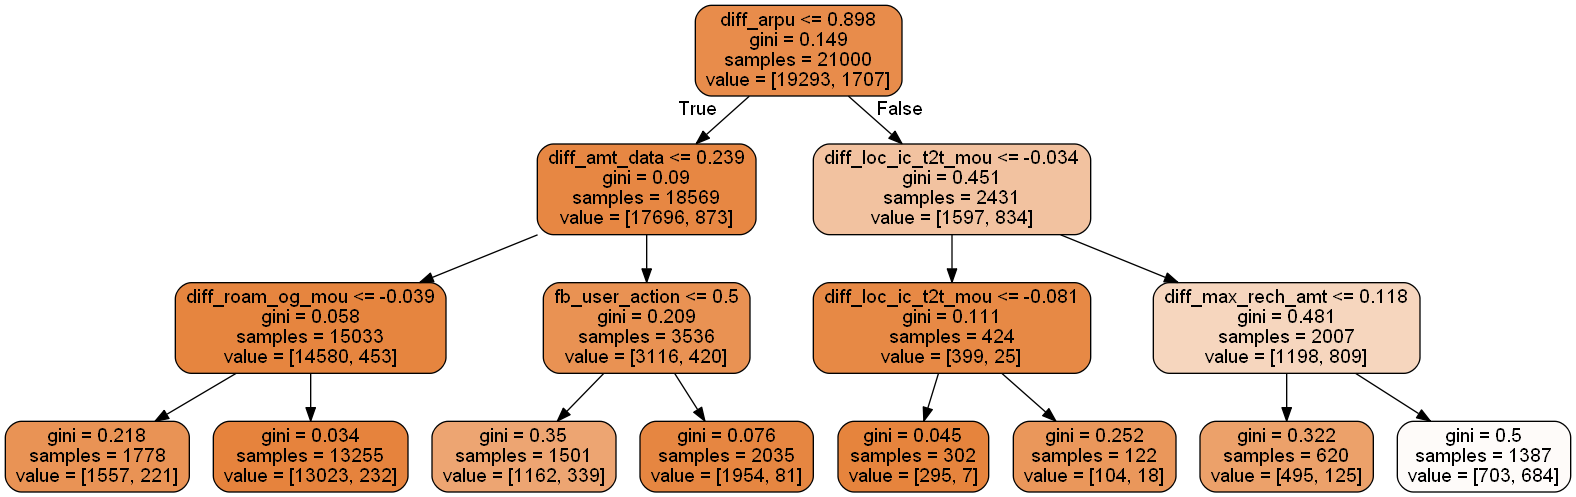

In [226]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [229]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred_default = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96      8267
          1       0.00      0.00      0.00       734

avg / total       0.84      0.92      0.88      9001



E:\Proj\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [228]:
# confusion matrix
print(confusion_matrix(y_test,y_pred_default))

[[8267    0]
 [ 734    0]]


## Random Forest

### Model Building

In [232]:
# Putting feature variable to X
X = churn_df_std

# Putting response variable to y
y = churn_df_filter['churned']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [233]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [234]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [235]:
# Making predictions
predictions = rfc.predict(X_test)

In [236]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [237]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97      8271
          1       0.72      0.33      0.46       730

avg / total       0.93      0.94      0.92      9001



In [238]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8176   95]
 [ 487  243]]


In [239]:
print(accuracy_score(y_test,predictions))

0.9353405177202533


# Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [241]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [242]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.274922      0.021549          0.03424        0.003509   
1       0.490864      0.033892          0.03522        0.003996   
2       0.740747      0.125586          0.03510        0.010464   
3       0.775566      0.030860          0.03486        0.006251   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.918353           0.918571   
1               7   {'max_depth': 7}           0.929303           0.934762   
2              12  {'max_depth': 12}           0.934301           0.944048   
3              17  {'max_depth': 17}           0.937872           0.943095   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.918571           0.918571           0.918552         0.918524   
1           0.928333           0.936190           0.934032         0.932524   
2           0.934524           0.940952           0.939748         0.938714   
3           0.931905           0.939048           0.940938         0.938571   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000086                4            0.918567            0.918512   
1        0.003120                3            0.935591            0.938214   
2        0.003783                1            0.967200            0.965238   
3        0.003774                2            0.985594            0.988869   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.918512            0.918512            0.918517   
1            0.939107            0.941250            0.938456   
2            0.968214            0.967381            0.969049   
3            0.988333            0.986726            0.987501   

   mean_train_score  std_train_score  
0          0.918524         0.000021  
1          0.938524         0.001815  
2          0.967417         0.001273  
3          0.987405         0.001162

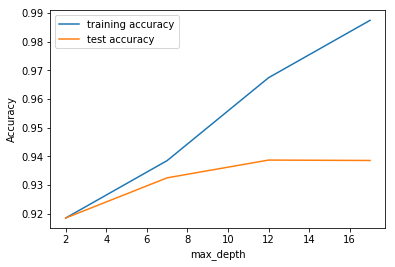

In [243]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning n_estimators

In [244]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
## Grid Search to Find Optimal Hyperparameters

In [245]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
**Fitting the final model with the best parameters obtained from grid search.**